<a href="https://colab.research.google.com/github/MSaeed1381/integropia_graph/blob/main/integropia_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install networkx
!pip install pandas
!pip install waterfall_ax
!pip install WaterfallChart

## import required packages

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import networkx as nx
import waterfall_chart
from waterfall_ax import WaterfallChart
import plotly.graph_objects as go

# settings
plt.rcParams["figure.figsize"] = (16, 8)
plt.style.use("fivethirtyeight");


## normalize the data

In [28]:
def normalize(data, scale=1):
    minimum, maximum = np.min(data), np.max(data)
    return ((data - minimum) / (maximum - minimum)) * scale

## Reading the files

In [29]:
df1 = pd.read_excel('files/2.xlsx')
# normalize number of saled with specefic scale value
df1['number of calls'] = normalize(df1['number of calls'], scale=10)
df1.head()

,apiName,consumerId,number of calls
0,main/SazmanTanzim/v1.0/shahkar,51,0.016061
1,main/ZaerInformation/v1.0/zaer-information,48,0.005782
2,main/arbaeen/v1.0/arbaeen,51,0.500145
3,main/emdad/v1.0/get-gr-code,51,0.451319
4,main/insurance_operation/v1.0/InsertPassenger,51,0.412451


In [48]:
df2 = pd.read_excel('files/1.xlsx')
df2.head(20)

,apinumber,apiname,node_key,count track code,avg(duration),stdev(duration),isService
0,2,main/SazmanTanzim/v1.0/shahkar,2/core_restrest_request_1,715,0.000000,0.000000,0
1,2,main/SazmanTanzim/v1.0/shahkar,2/core_restrest_response_1,710,0.006532,0.007433,0
2,2,main/SazmanTanzim/v1.0/shahkar,2/itg_int_utilitiesget_date_1,715,0.000322,0.000485,0
3,2,main/SazmanTanzim/v1.0/shahkar,2/shahkarServiceIDmatching_1,715,0.358664,0.443820,1
4,97,main/naja_service/v1.0/validatepassportbyitems,97/core_restrest_request_1,65,0.000000,0.000000,0
5,97,main/naja_service/v1.0/validatepassportbyitems,97/core_restrest_response_1,59,0.008313,0.013950,0
6,97,main/naja_service/v1.0/validatepassportbyitems,97/core_restrest_response_2,6,0.005000,0.001155,0
7,97,main/naja_service/v1.0/validatepassportbyitems,97/itg_int_utilitiesscript_runner_1,6,0.010286,0.026336,0
8,97,main/naja_service/v1.0/validatepassportbyitems,97/itg_int_utilitiesscript_runner_2,6,0.000000,0.000000,0
9,97,main/naja_service/v1.0/validatepassportbyitems,97/itg_int_utilitiesscript_runner_3,6,0.000143,0.000378,0


## Plotting Waterfall chart for each flow

<ipython-input-110-bd4c8e758234>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(16,10))


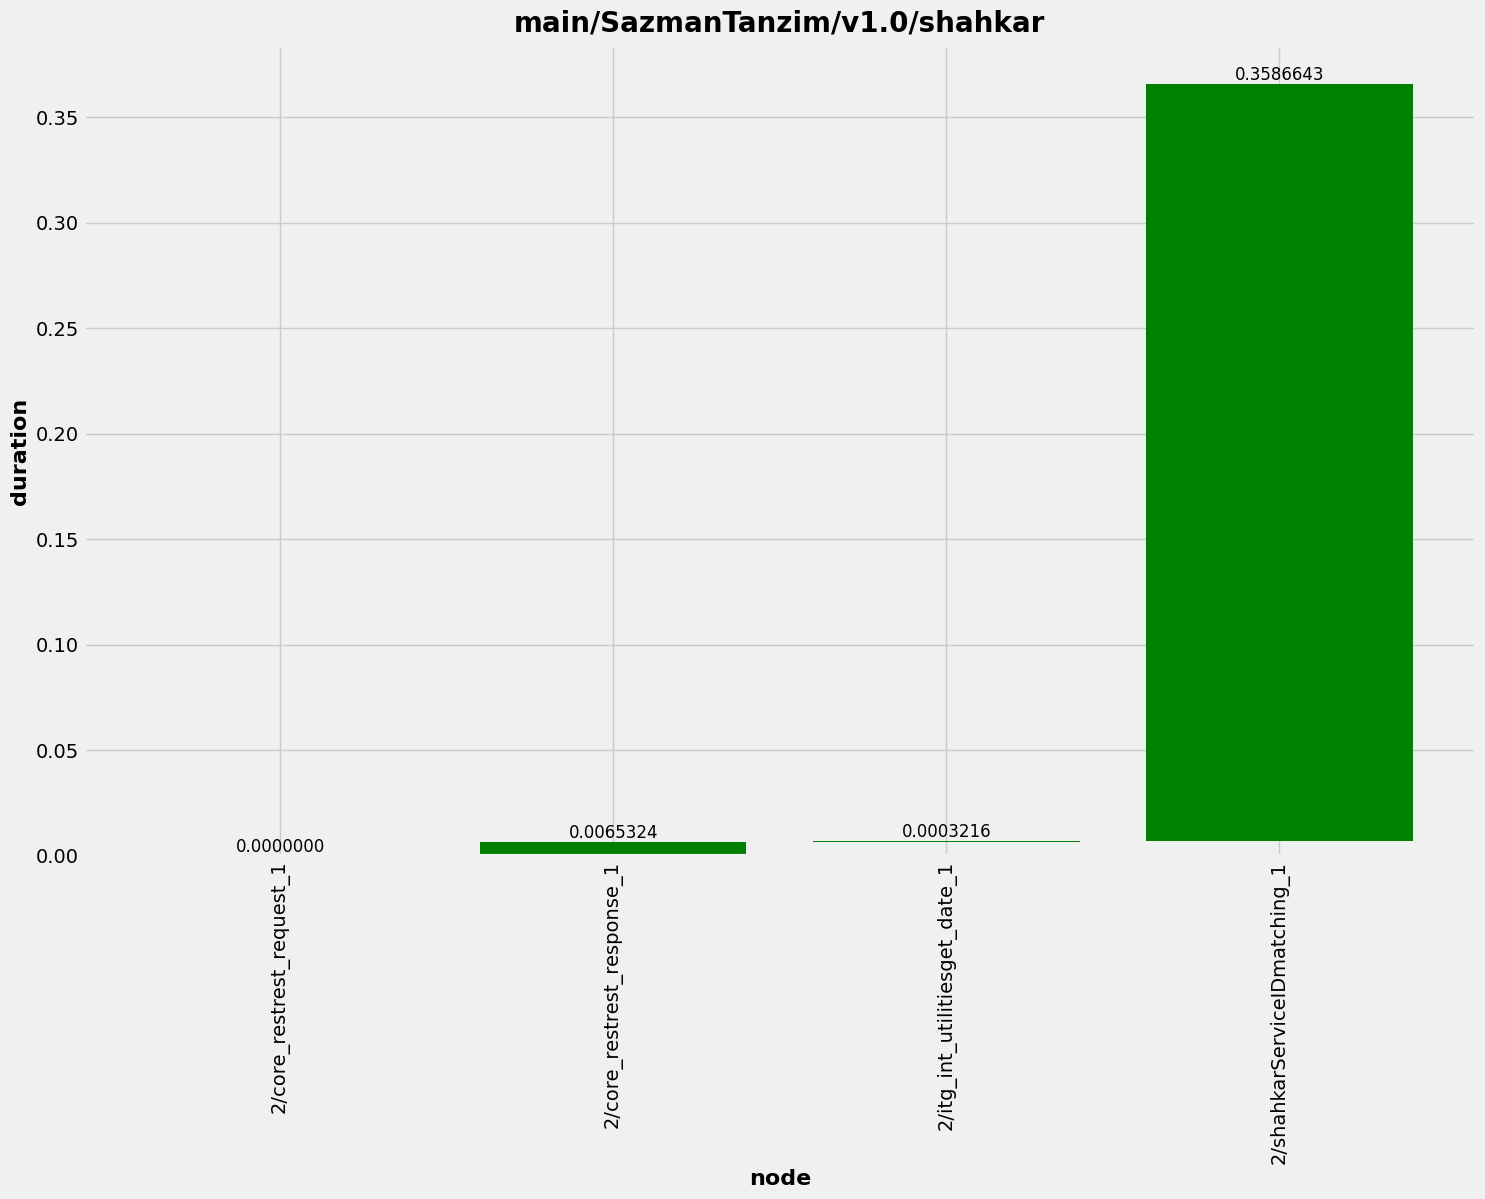

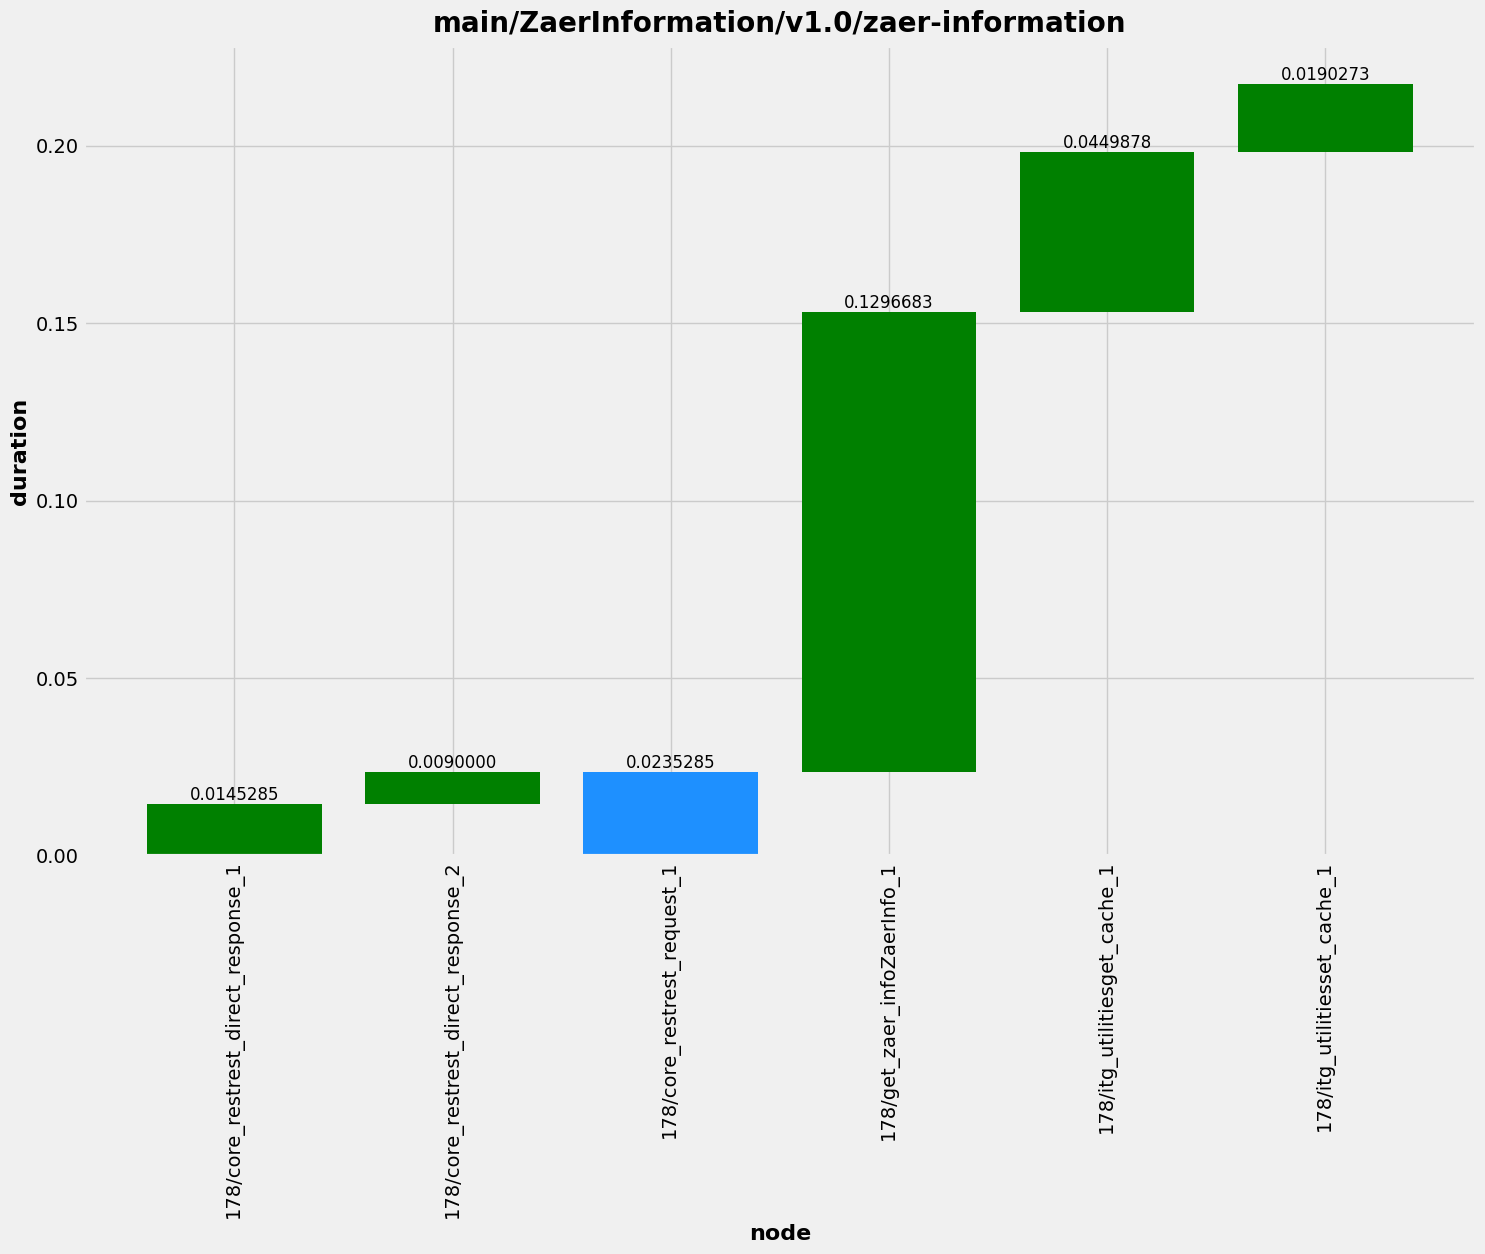

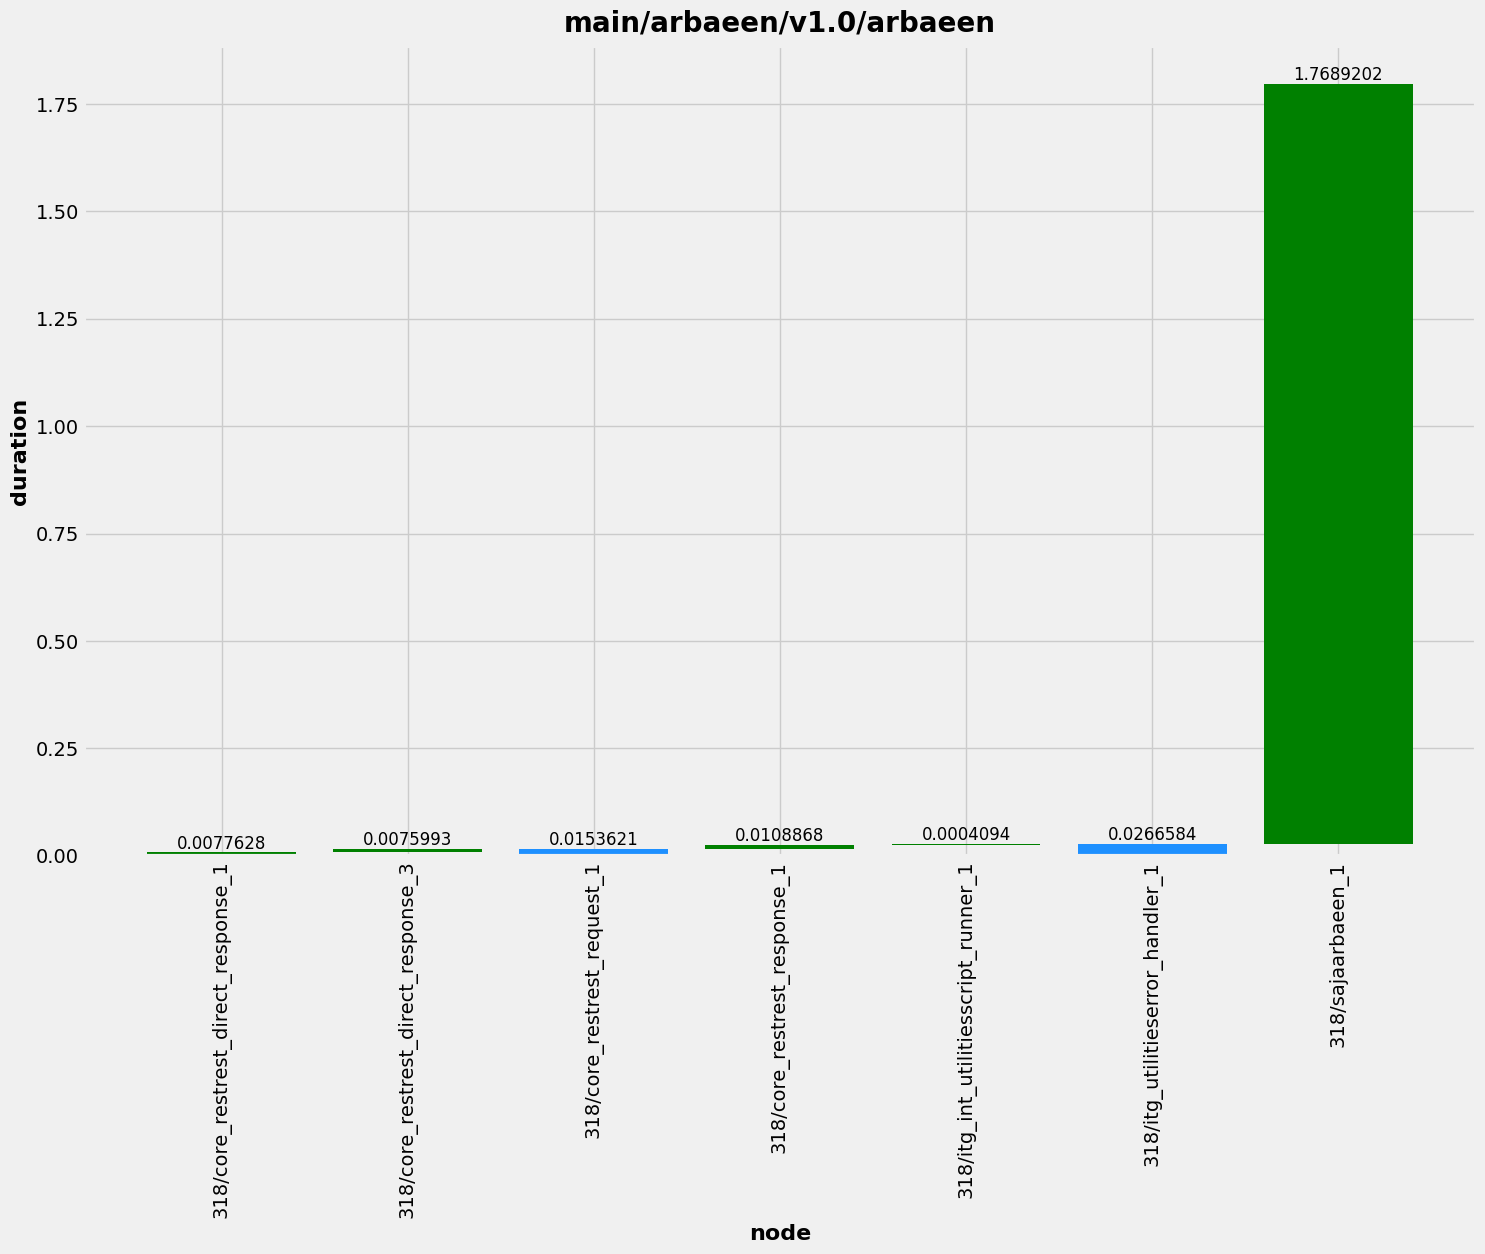

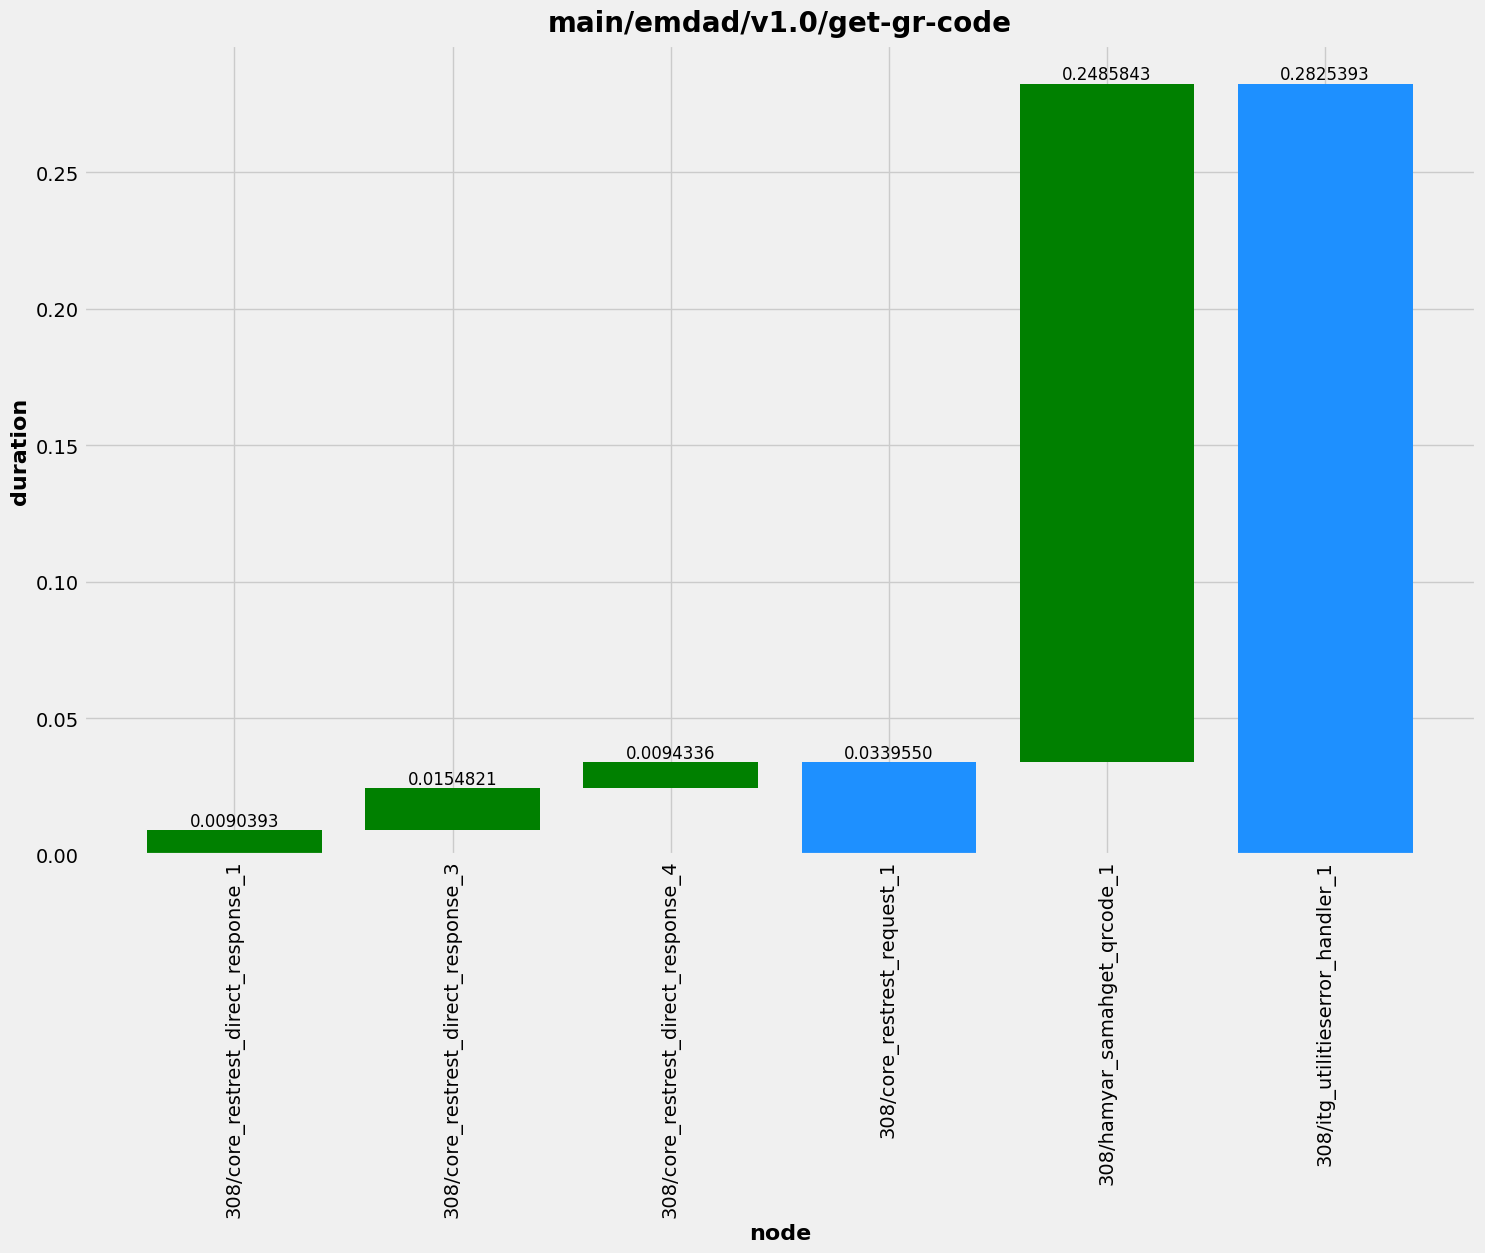

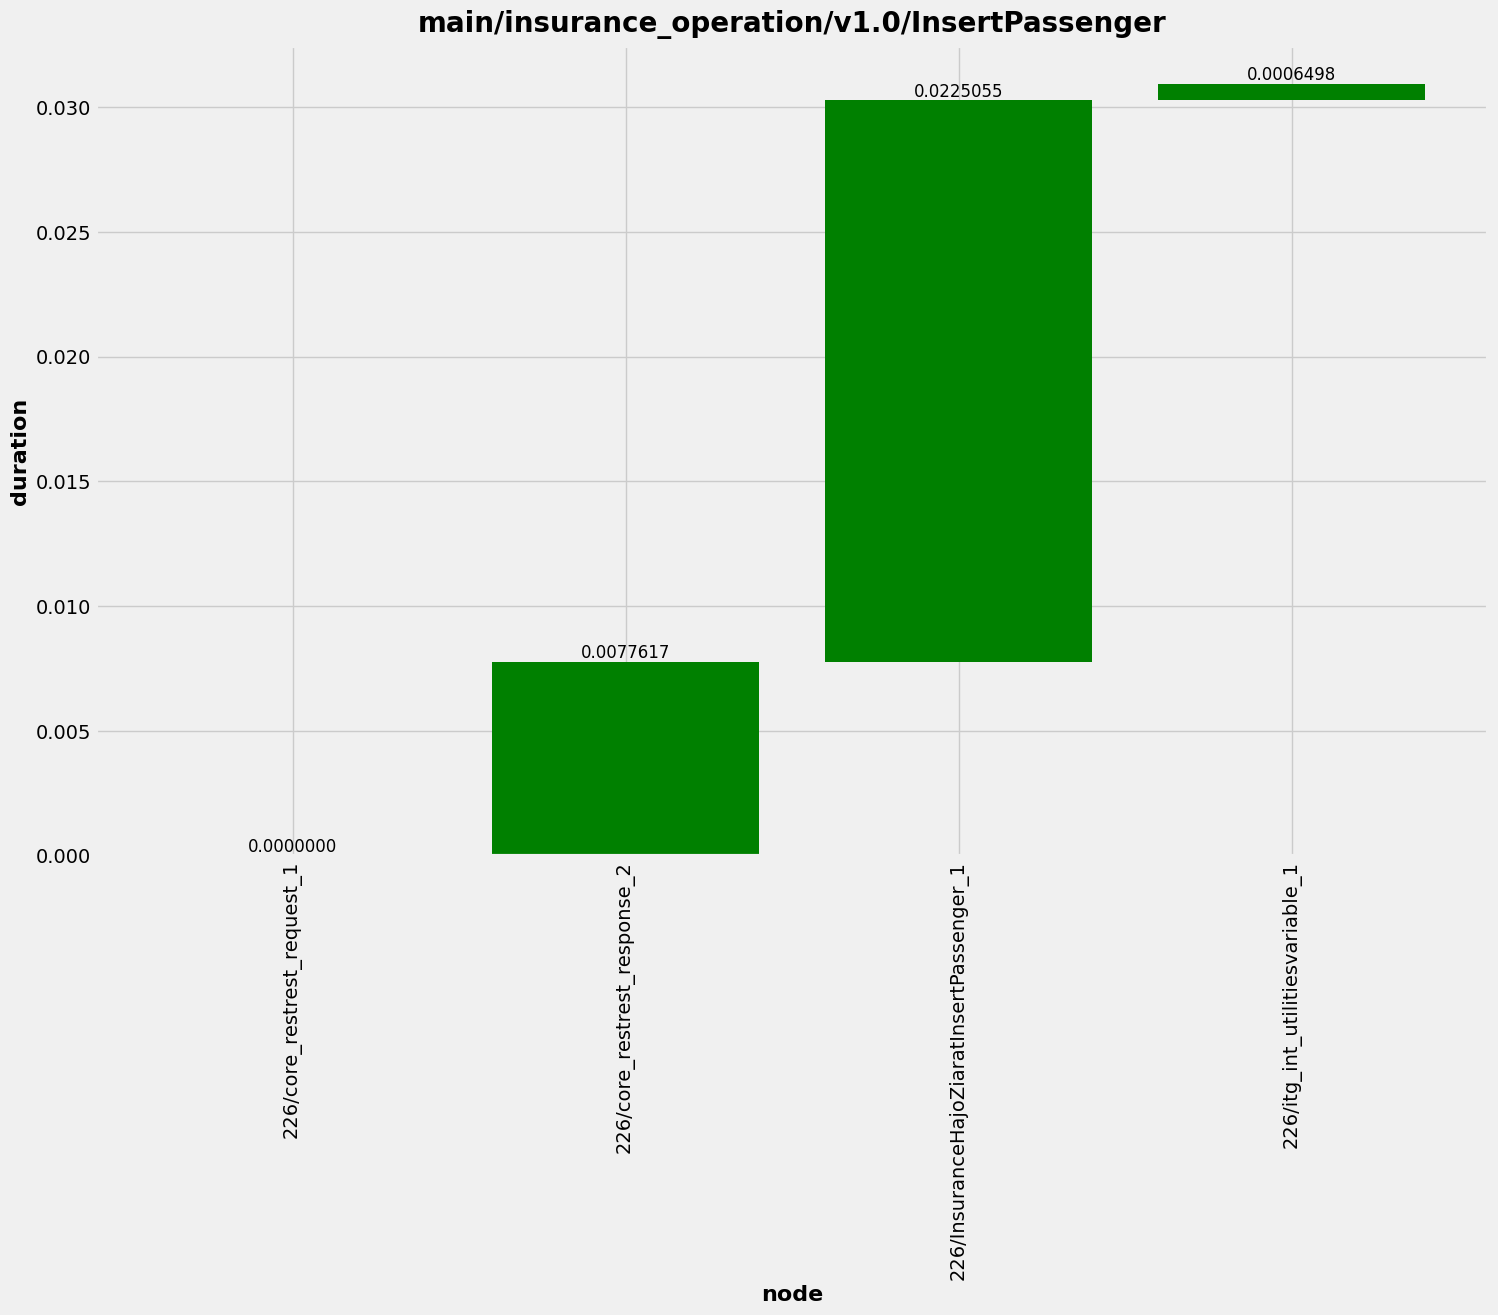

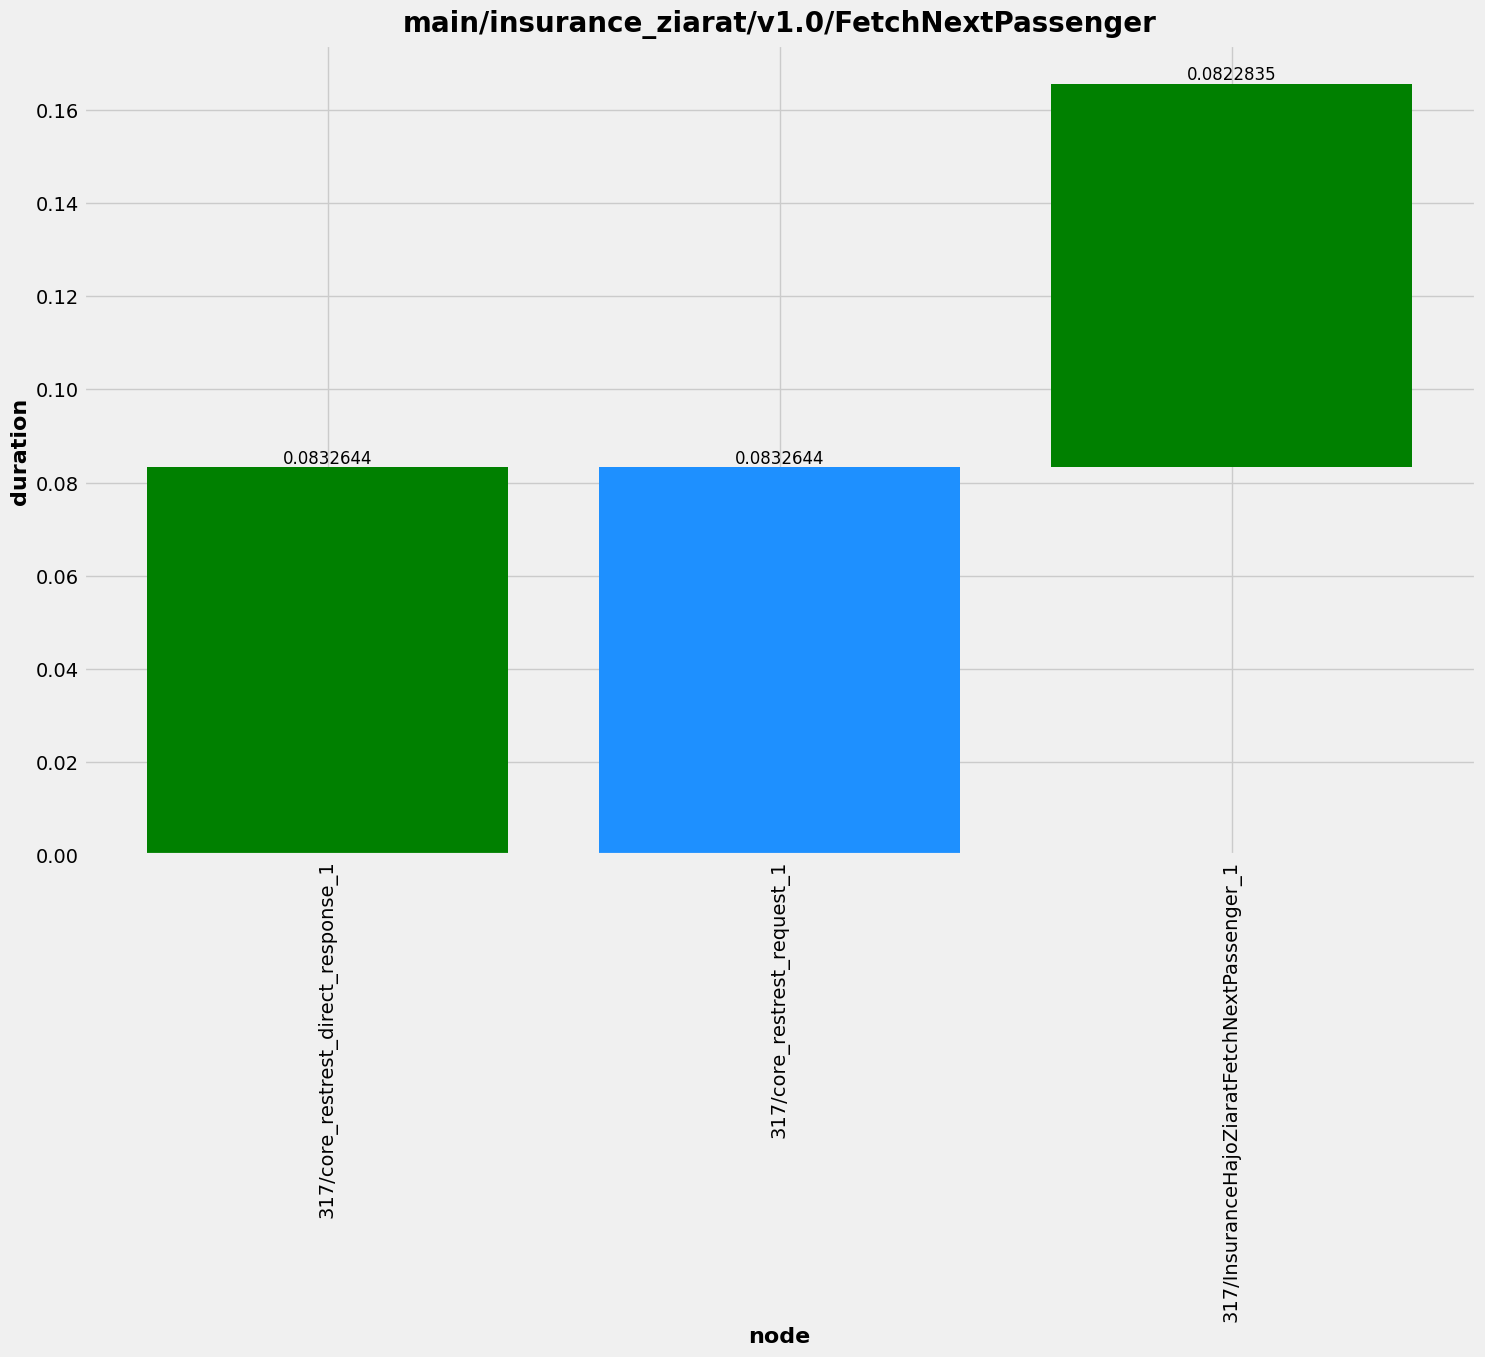

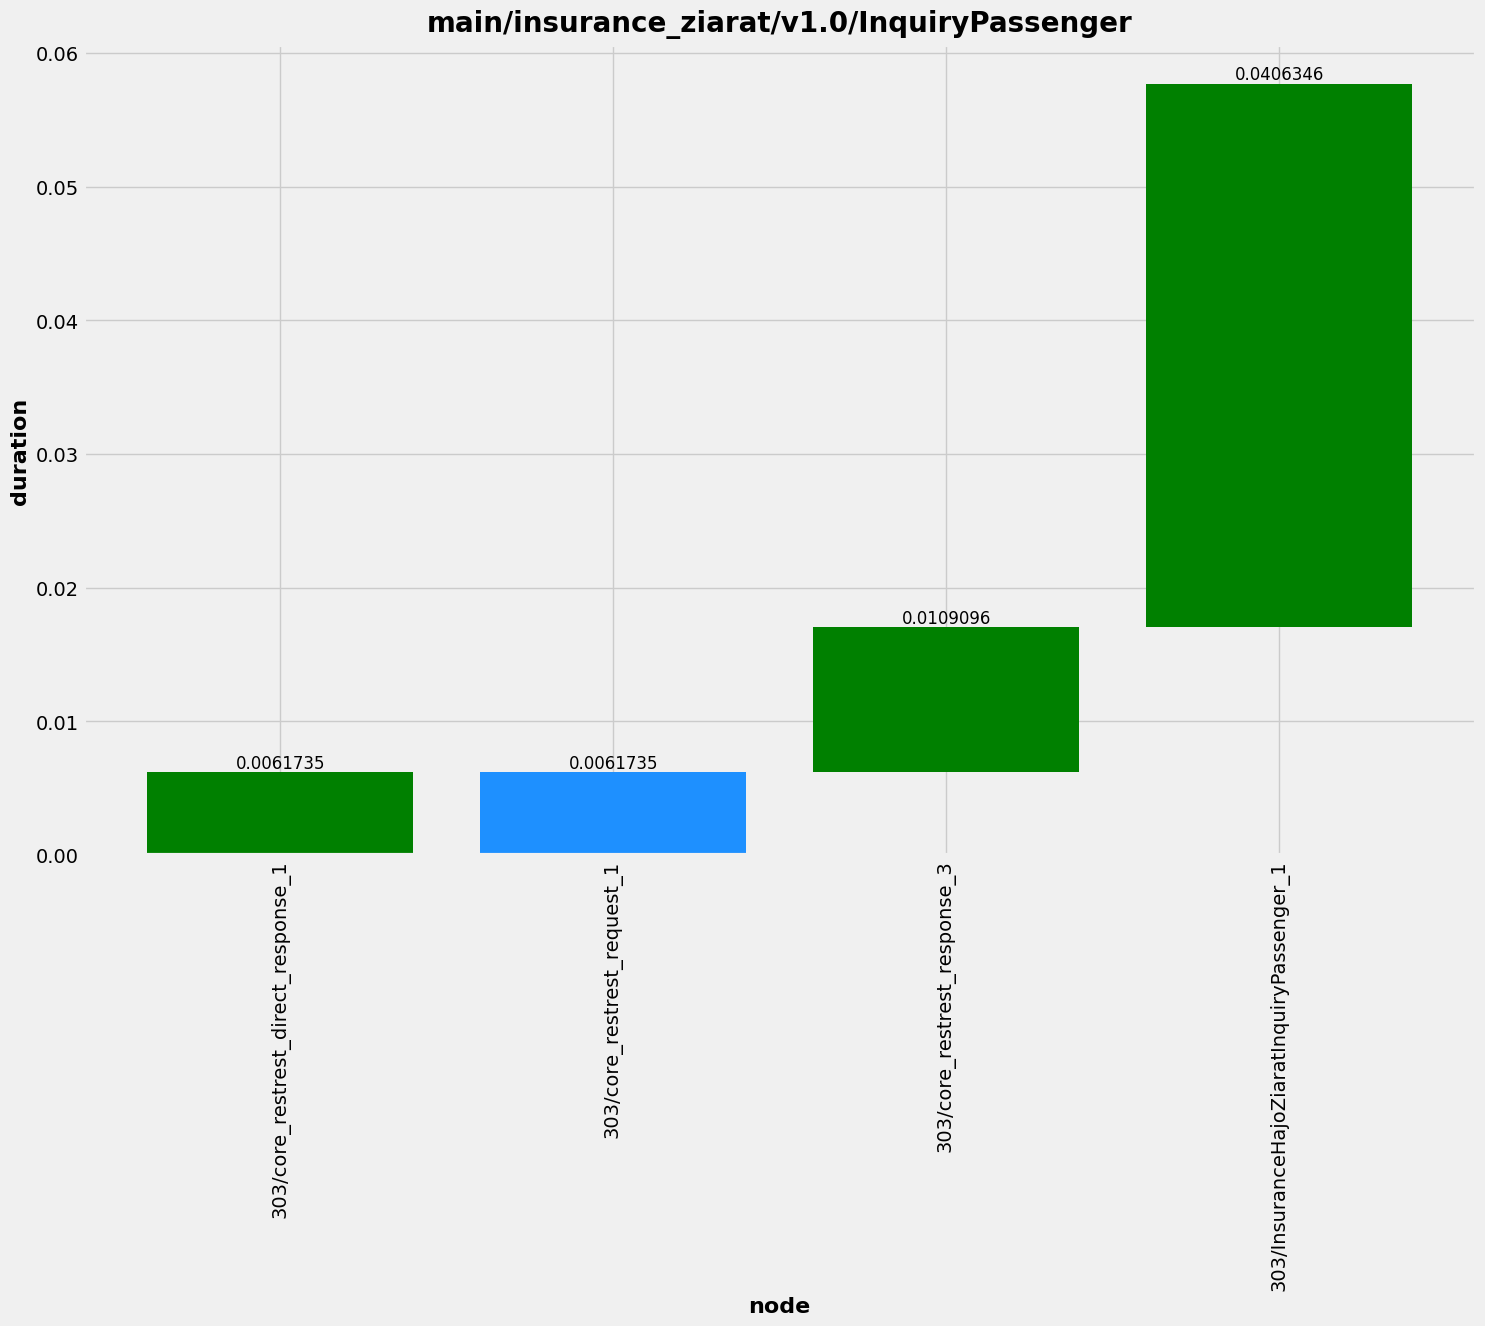

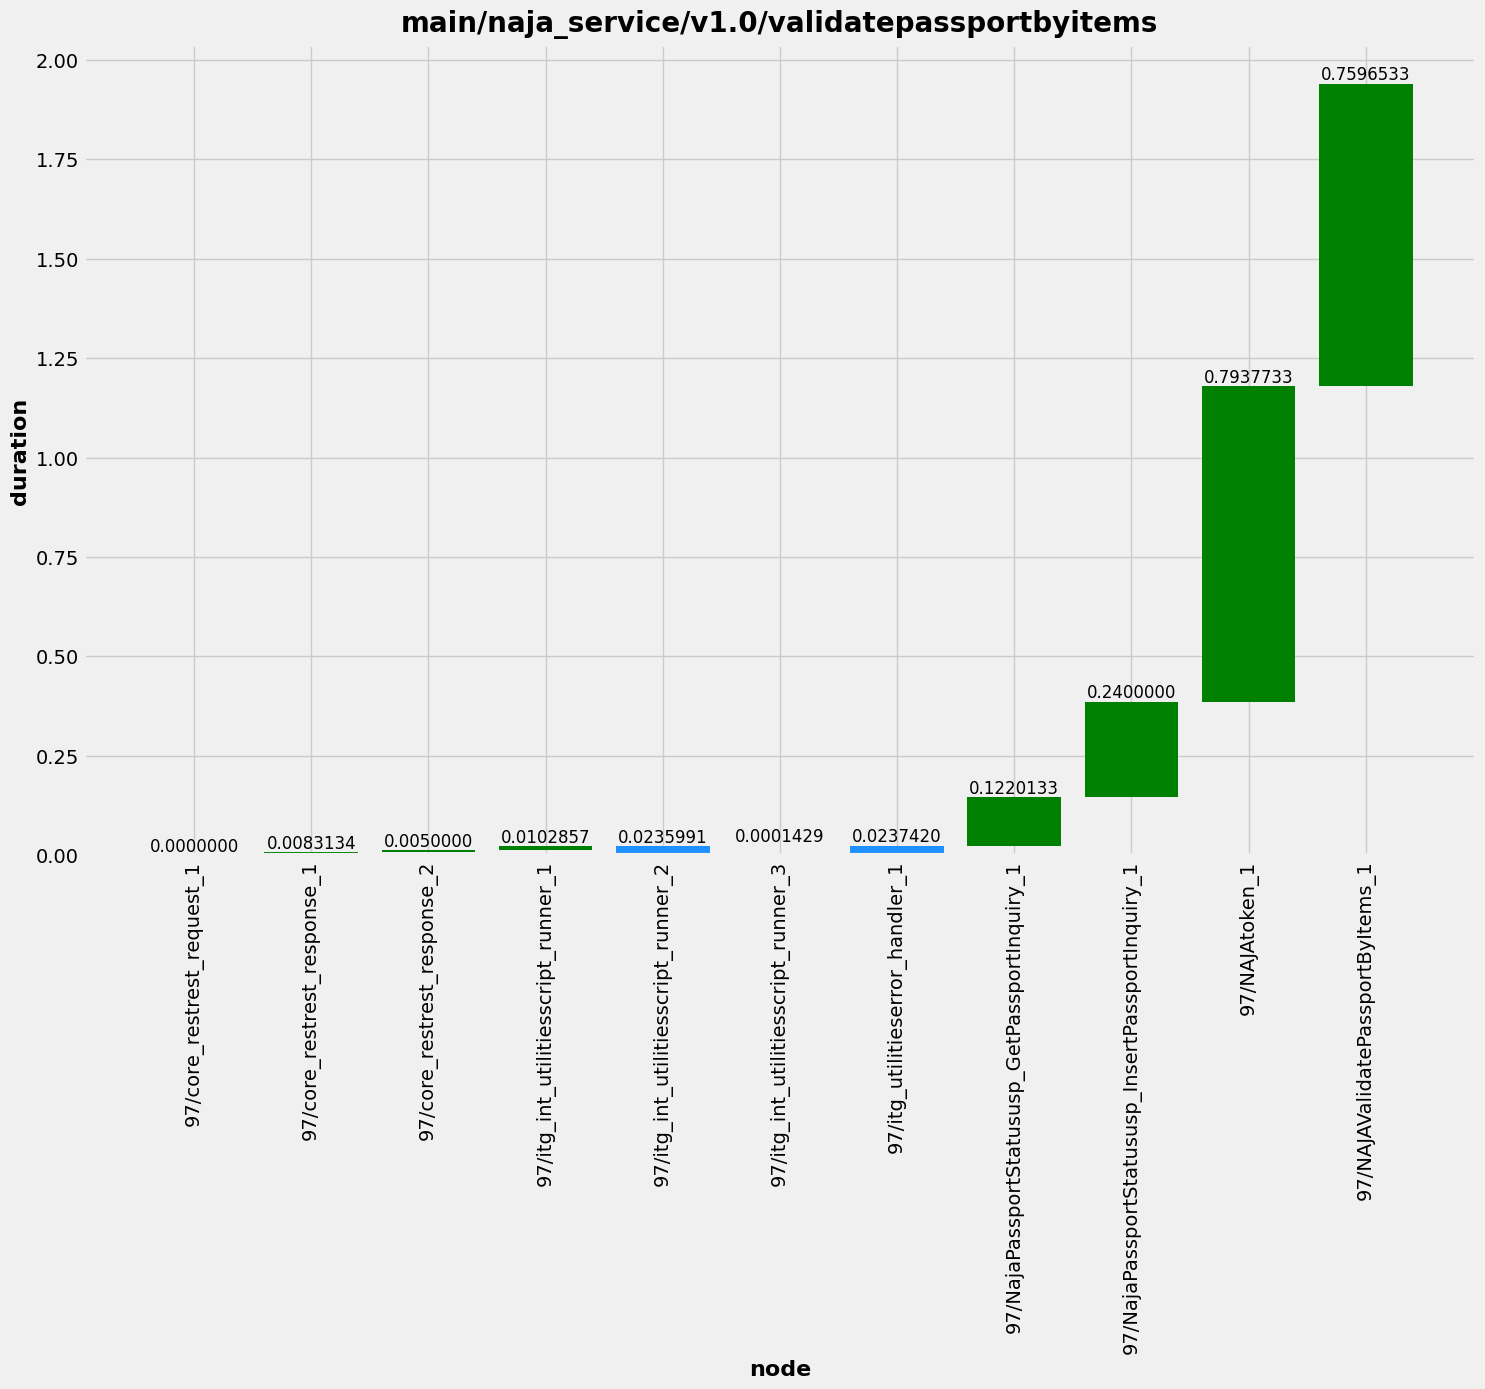

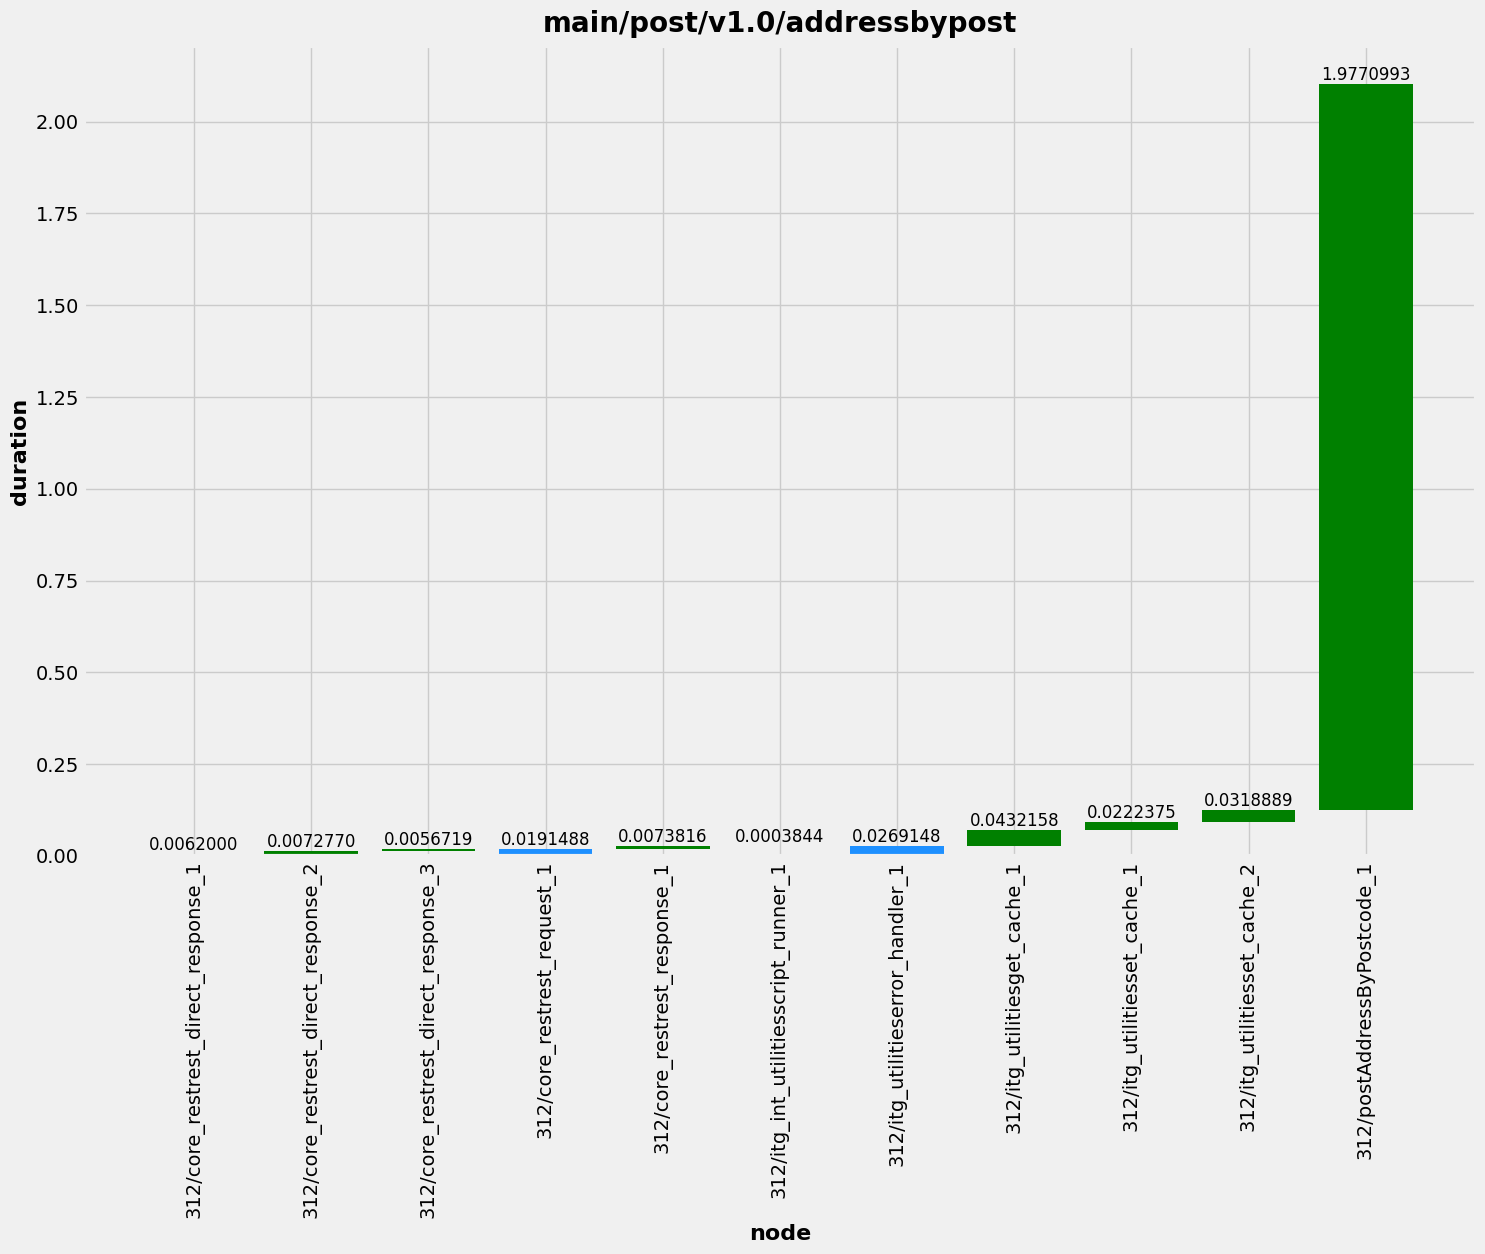

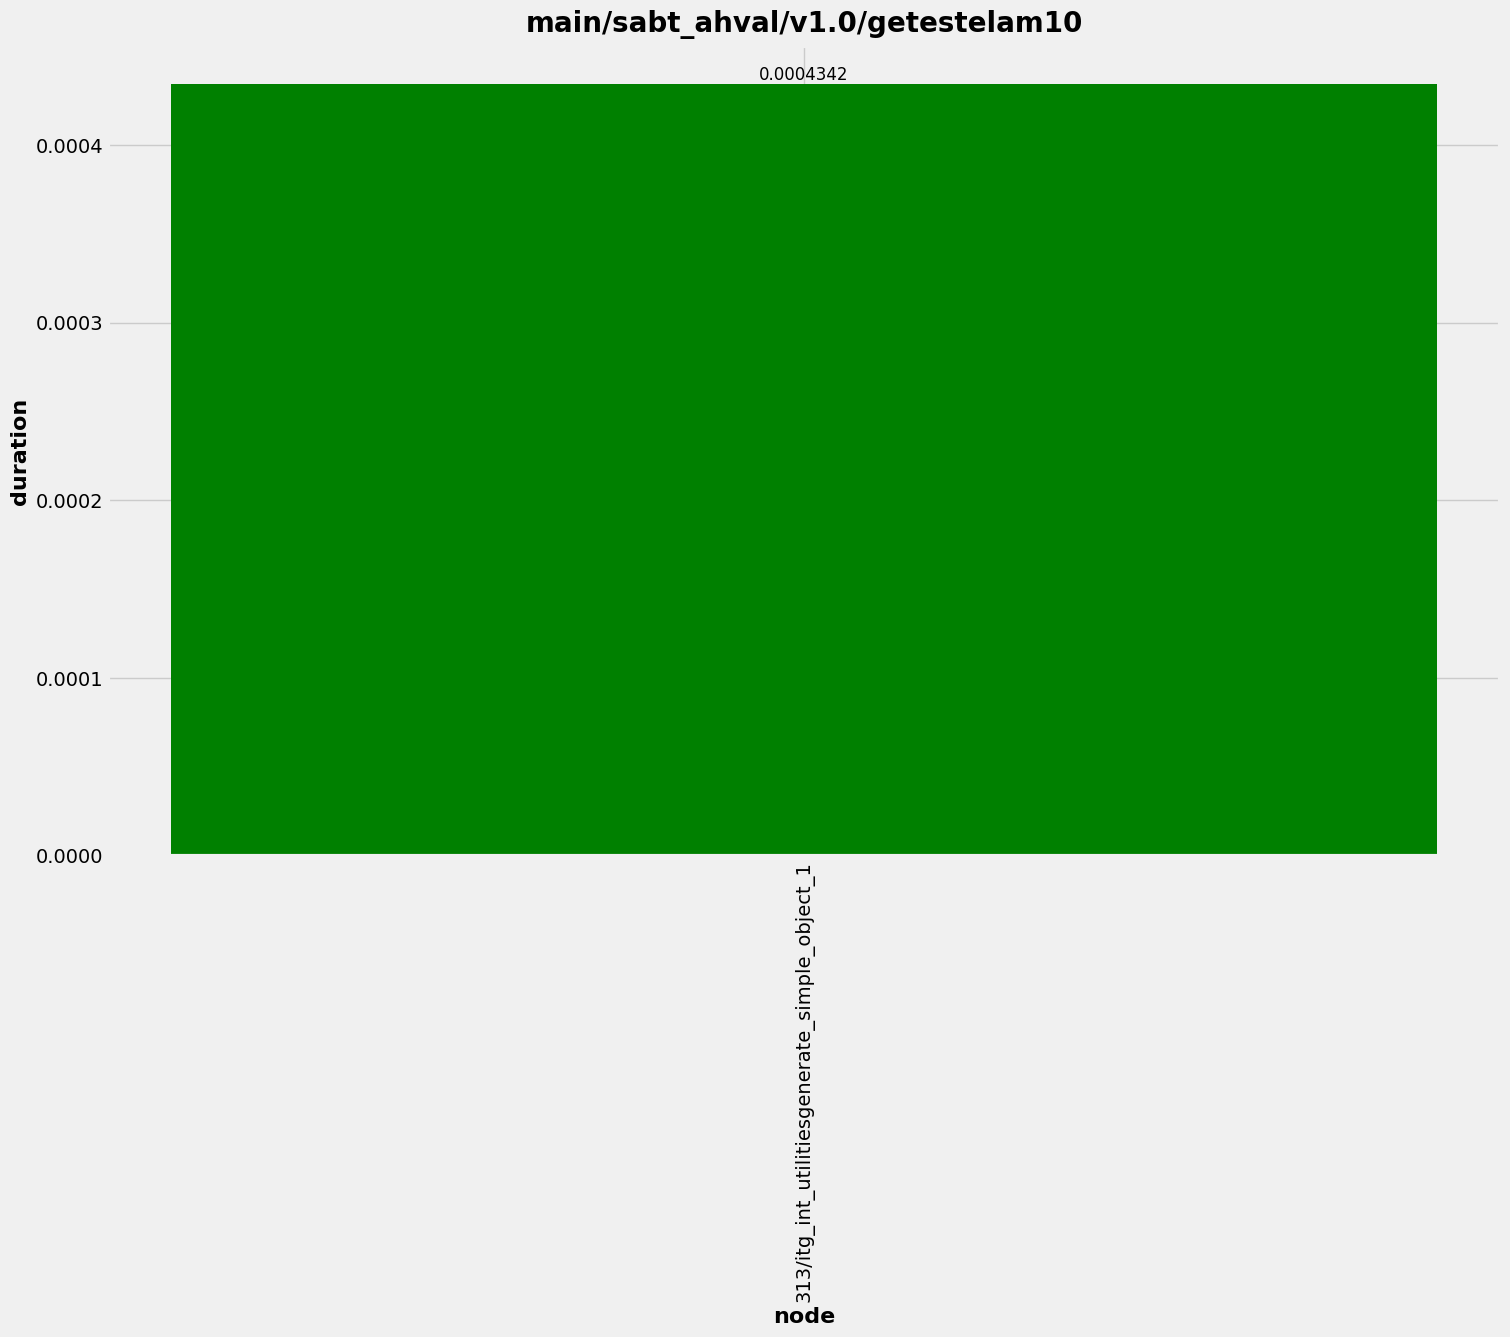

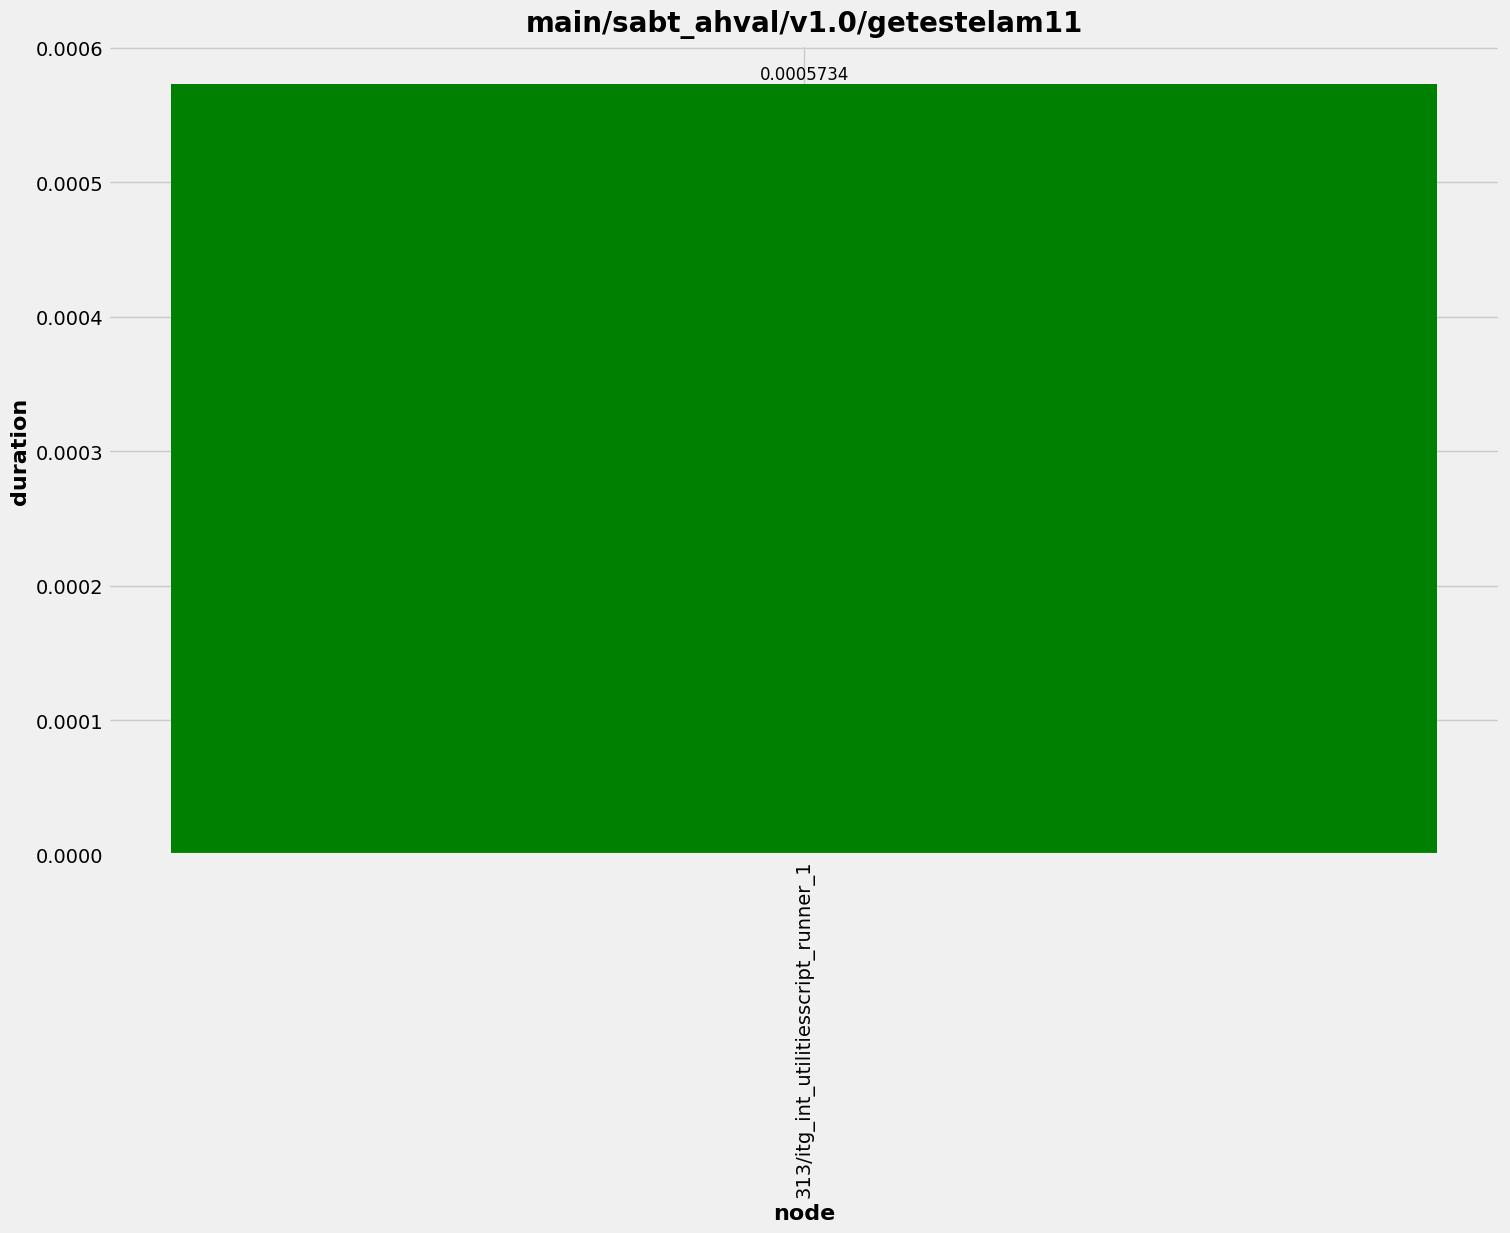

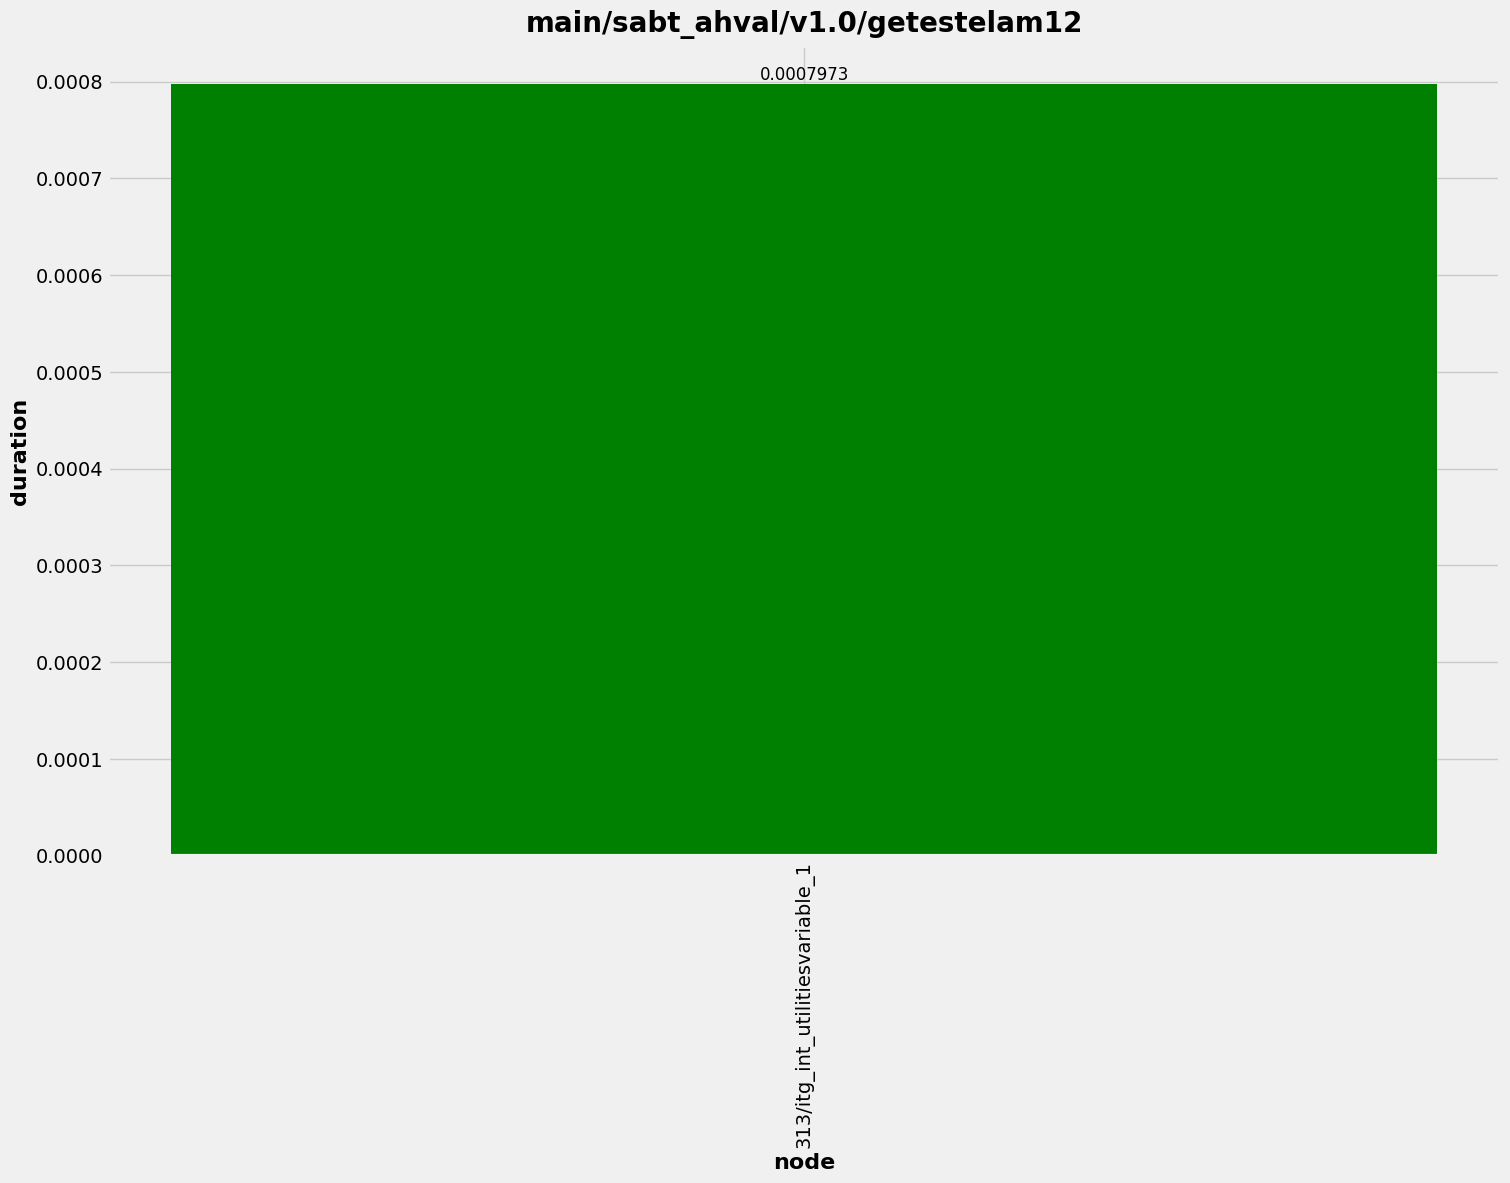

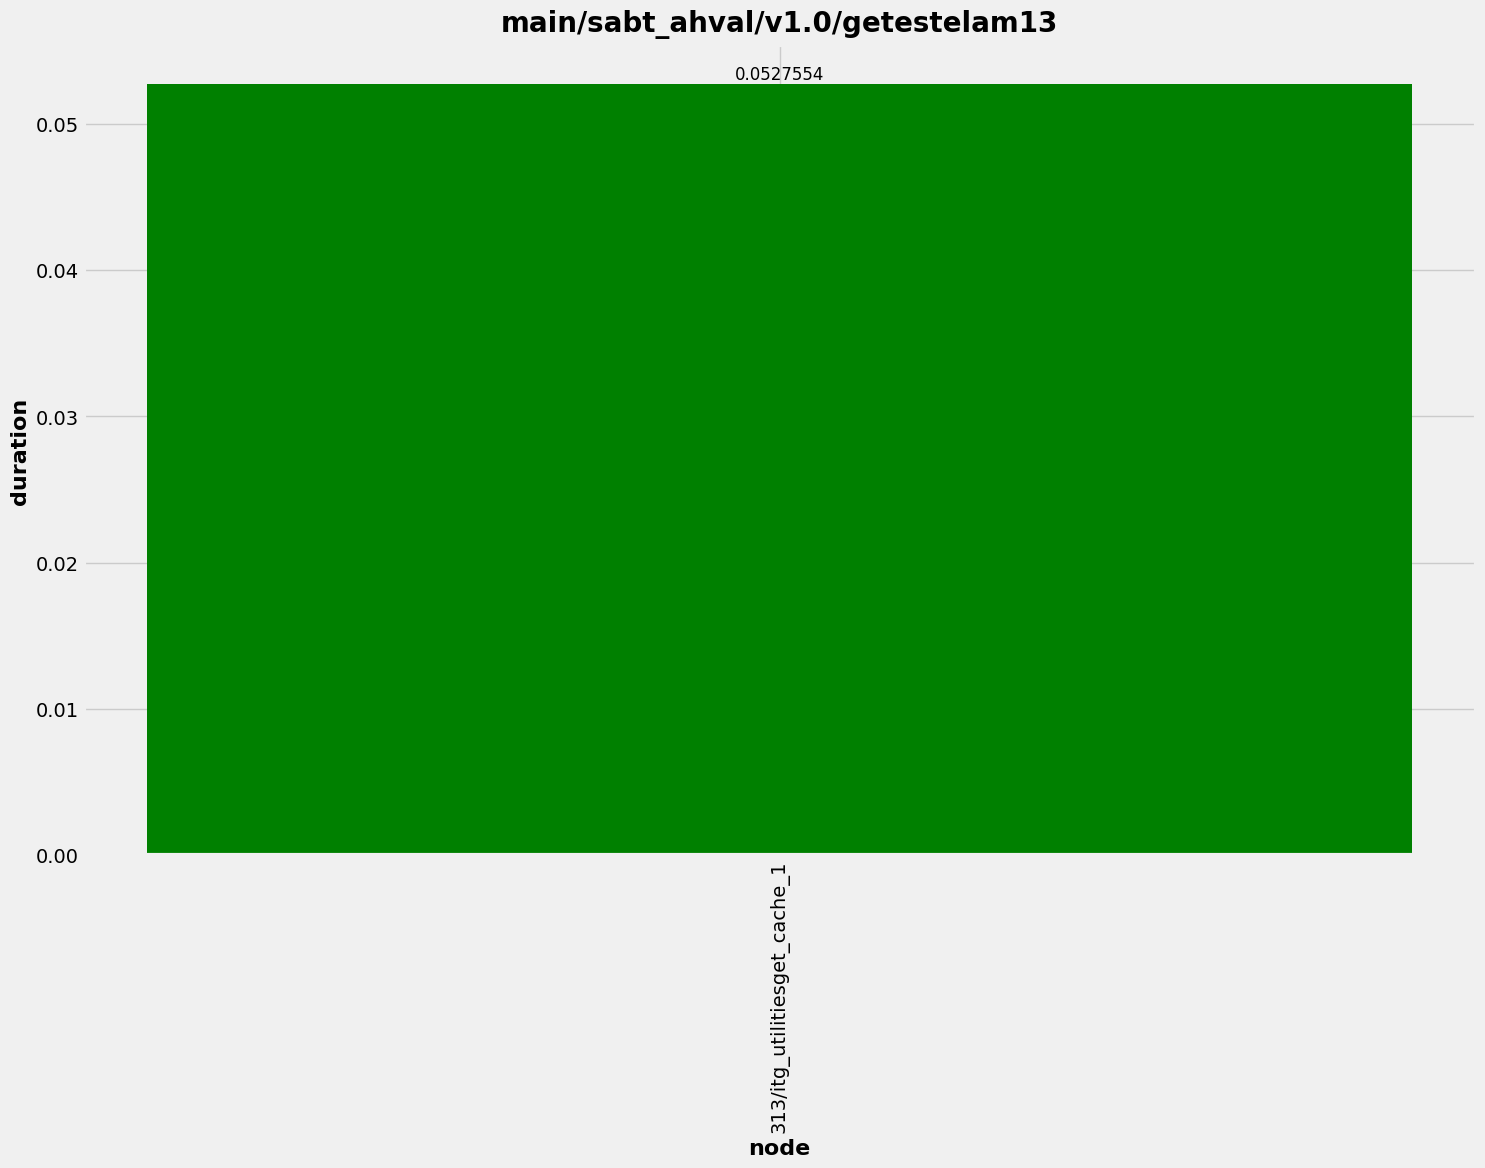

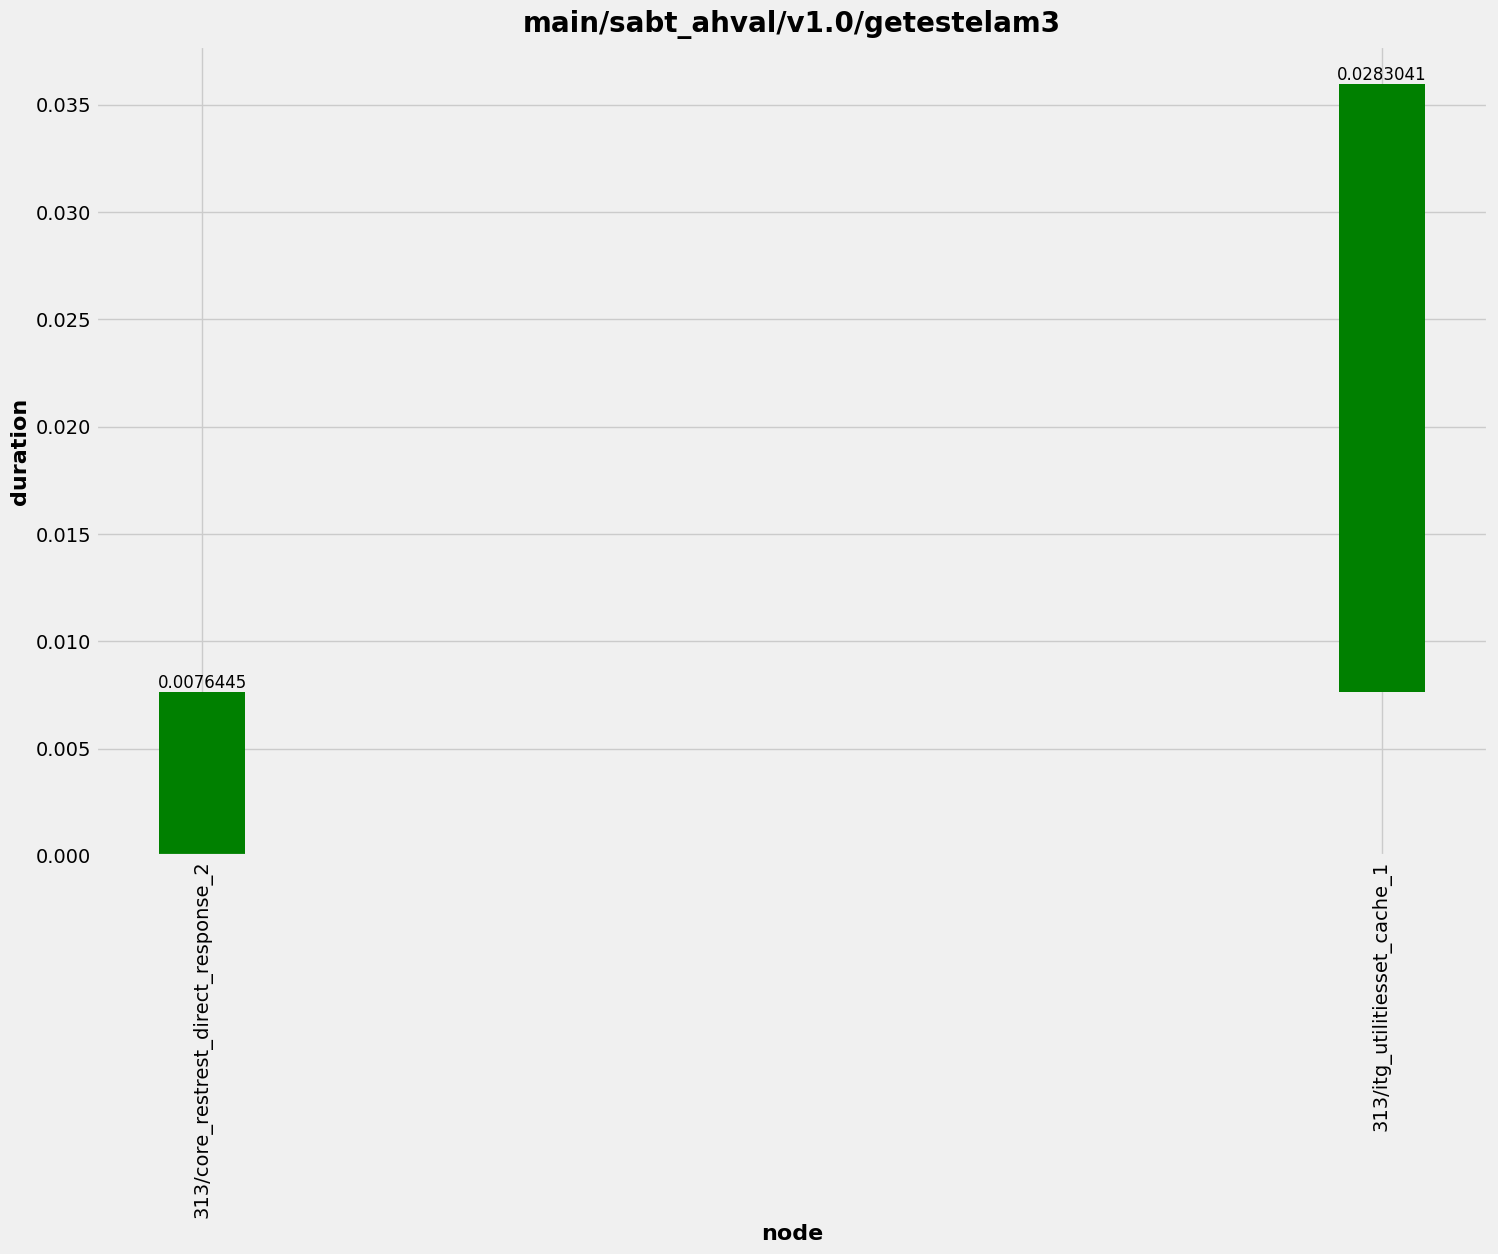

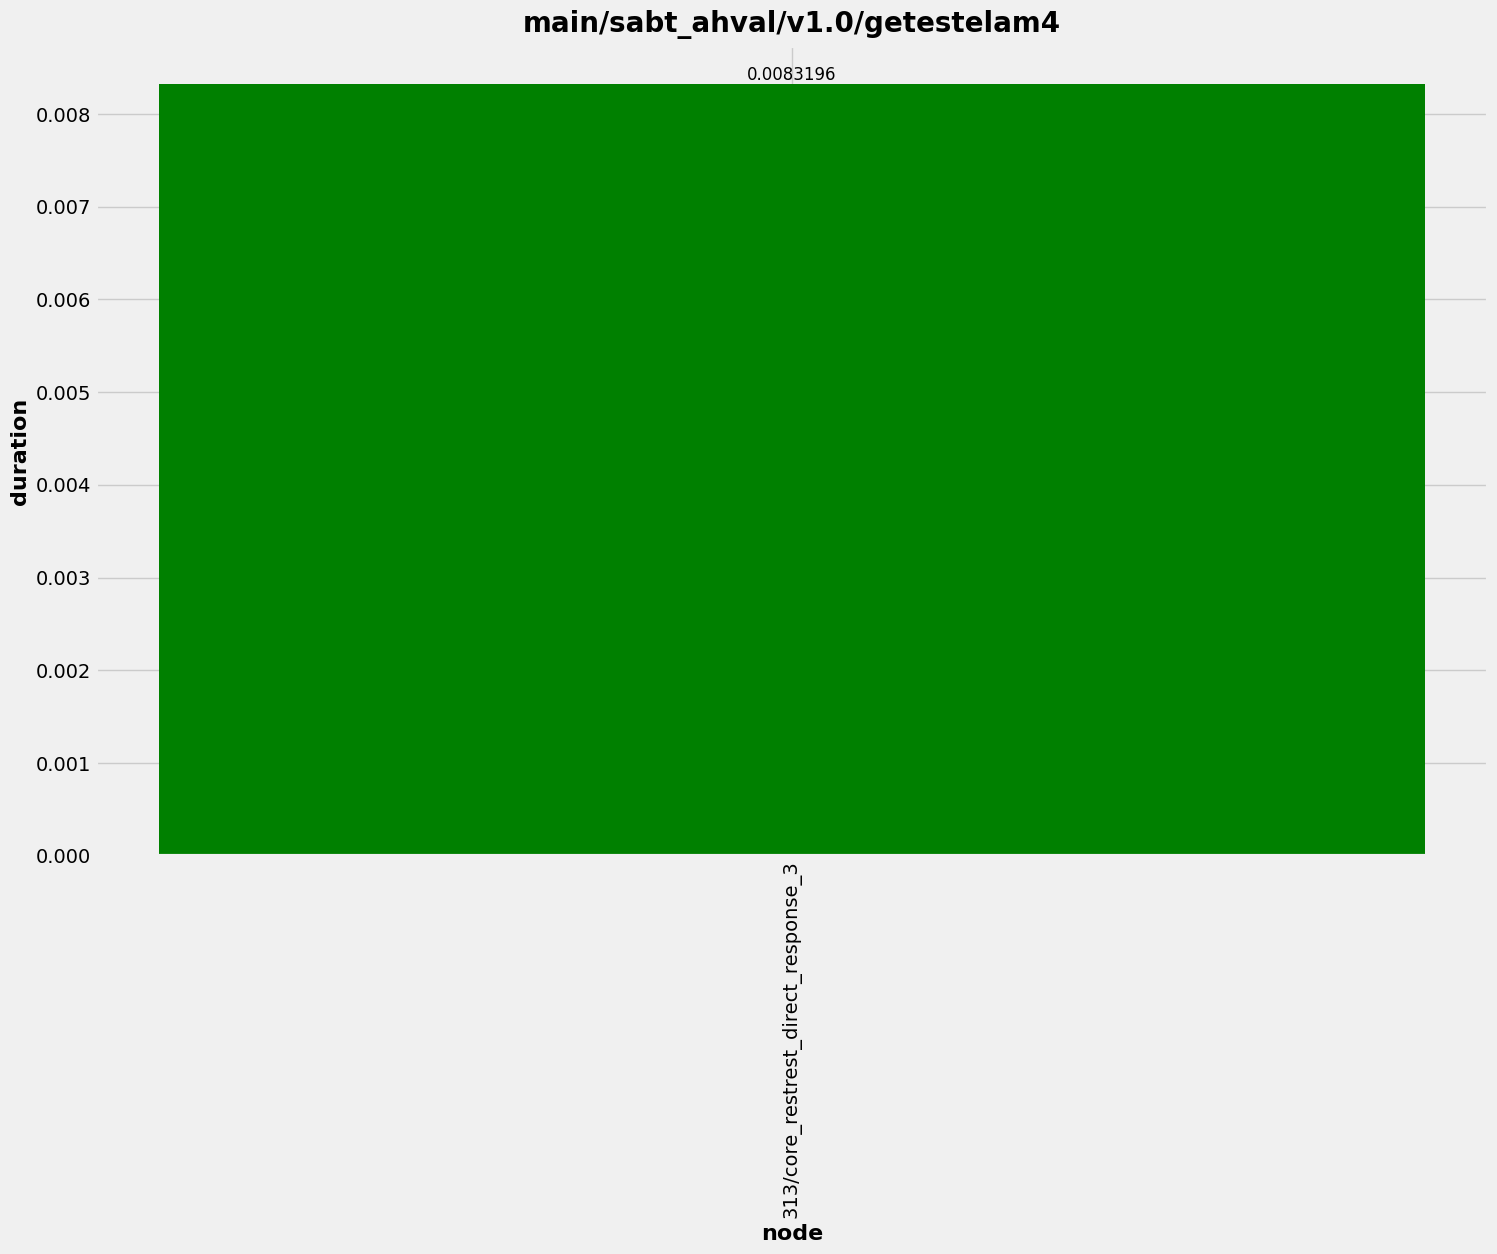

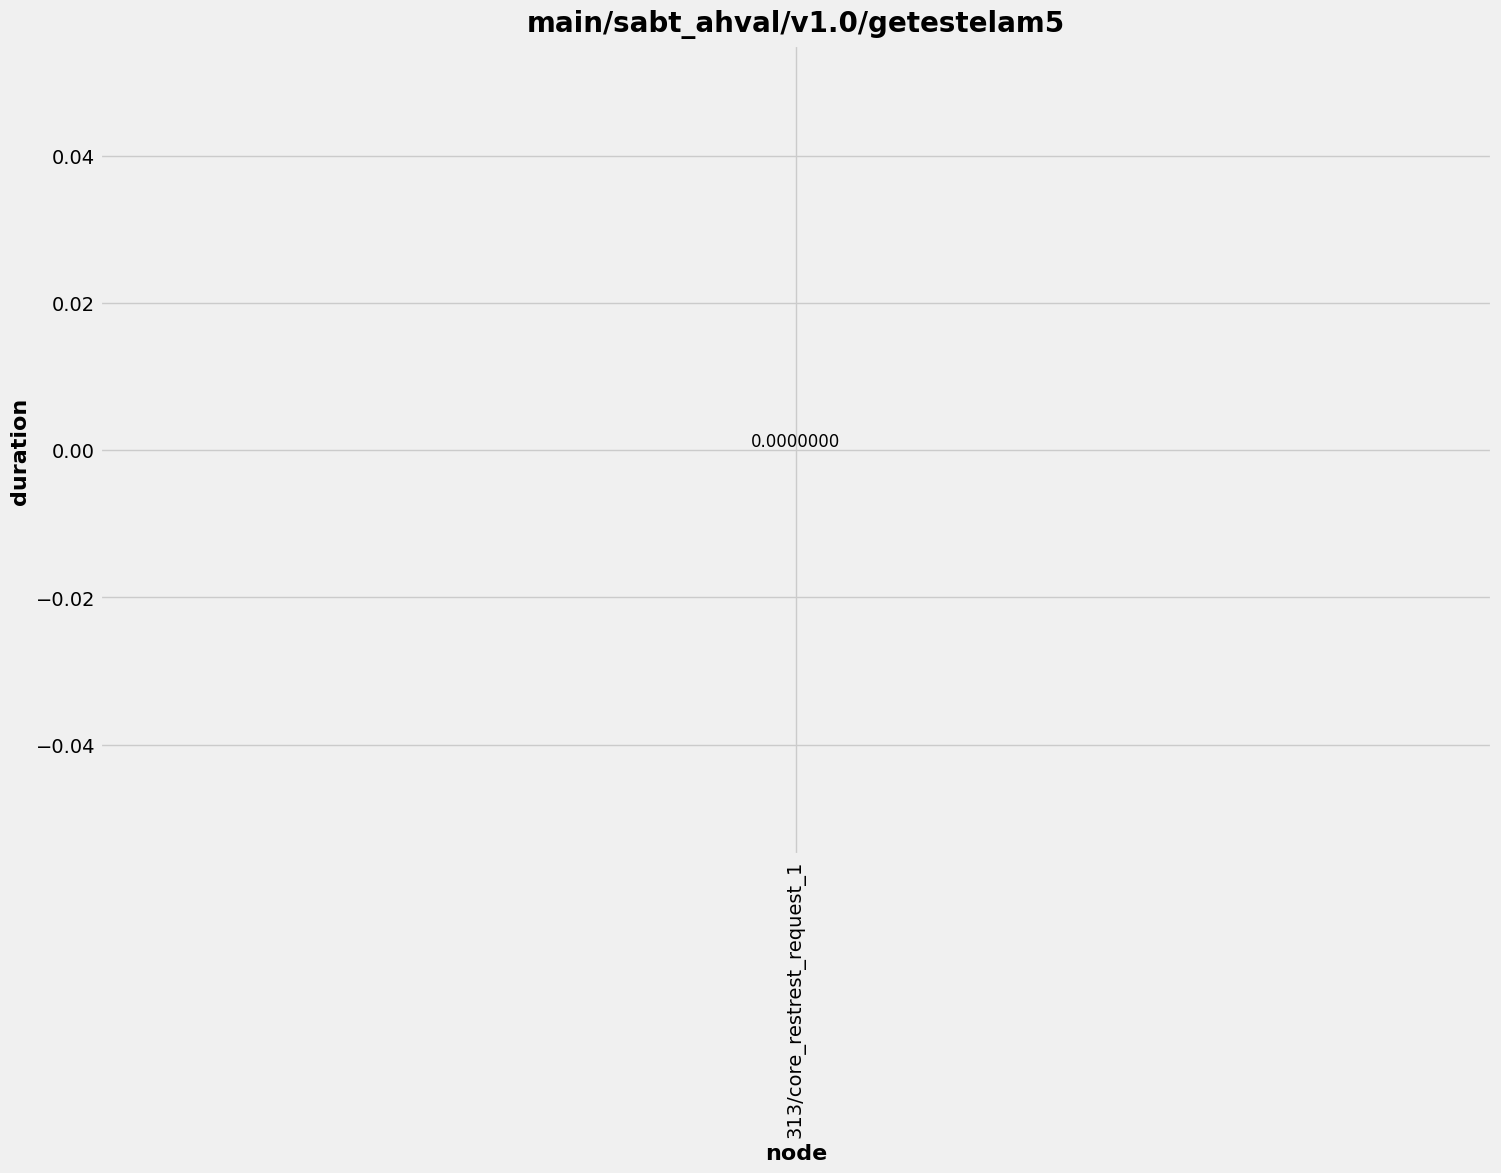

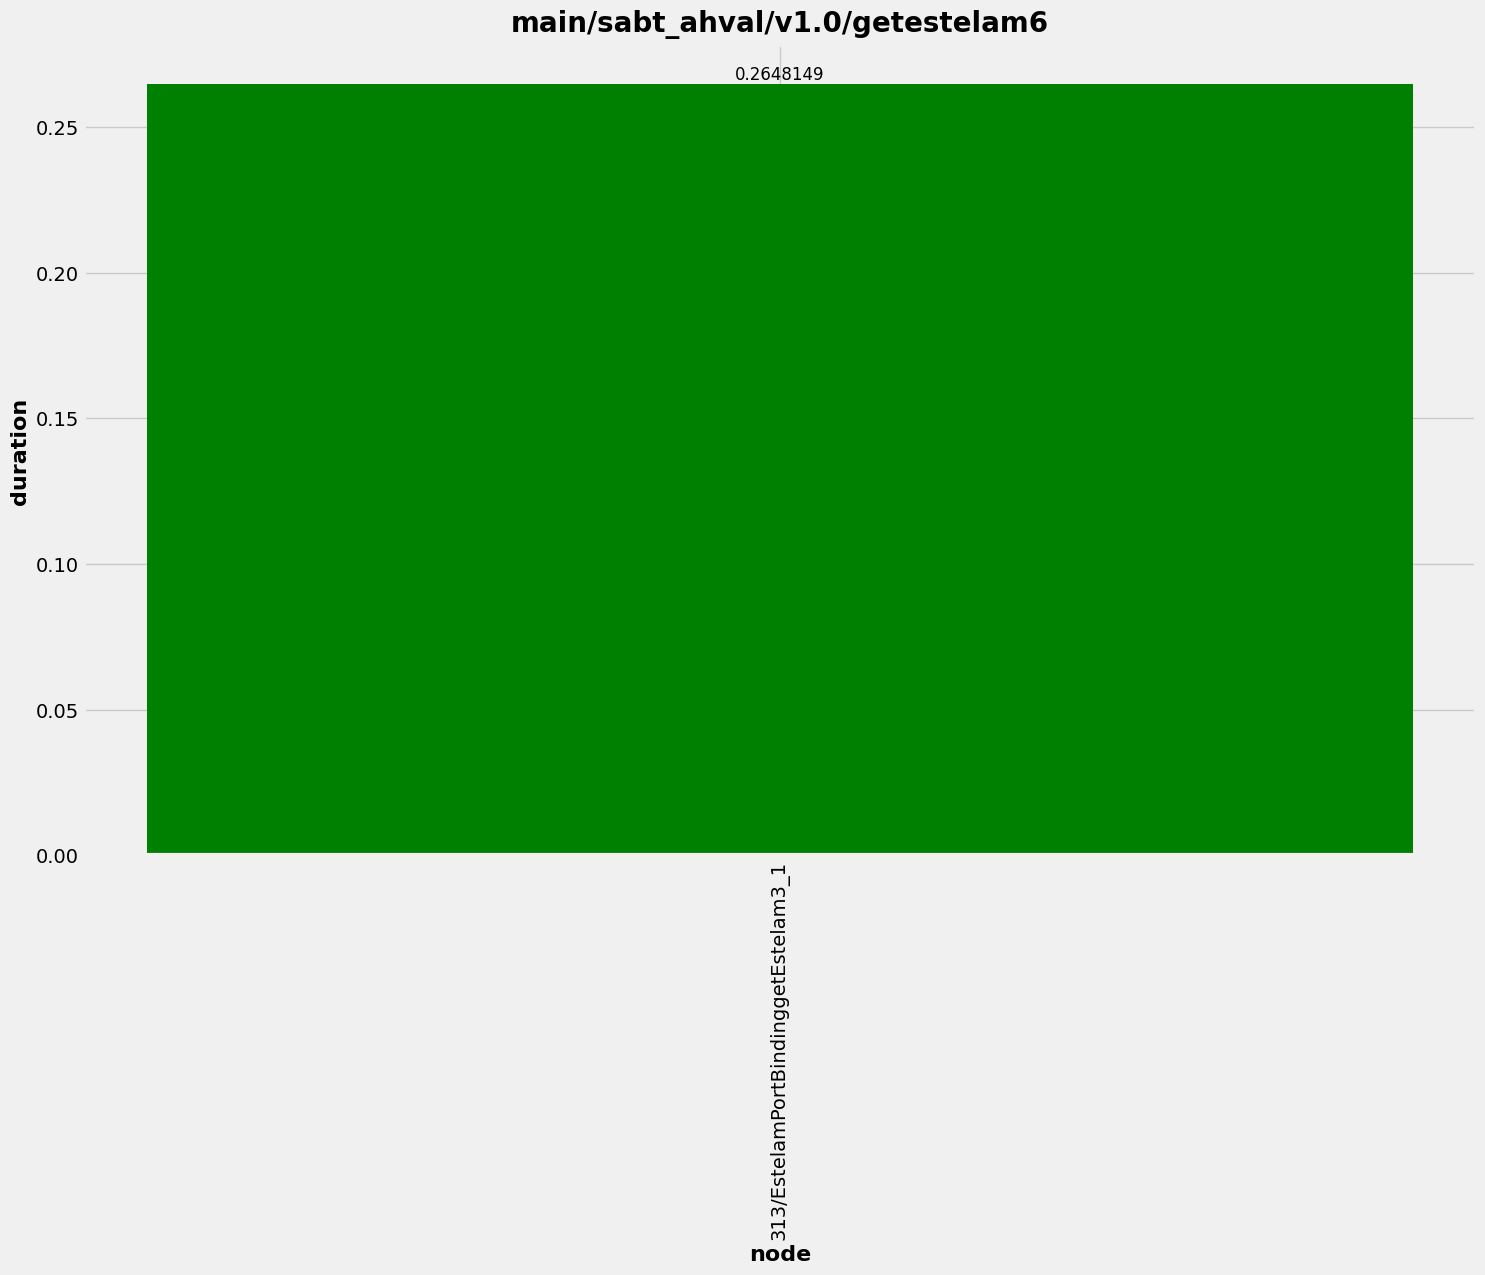

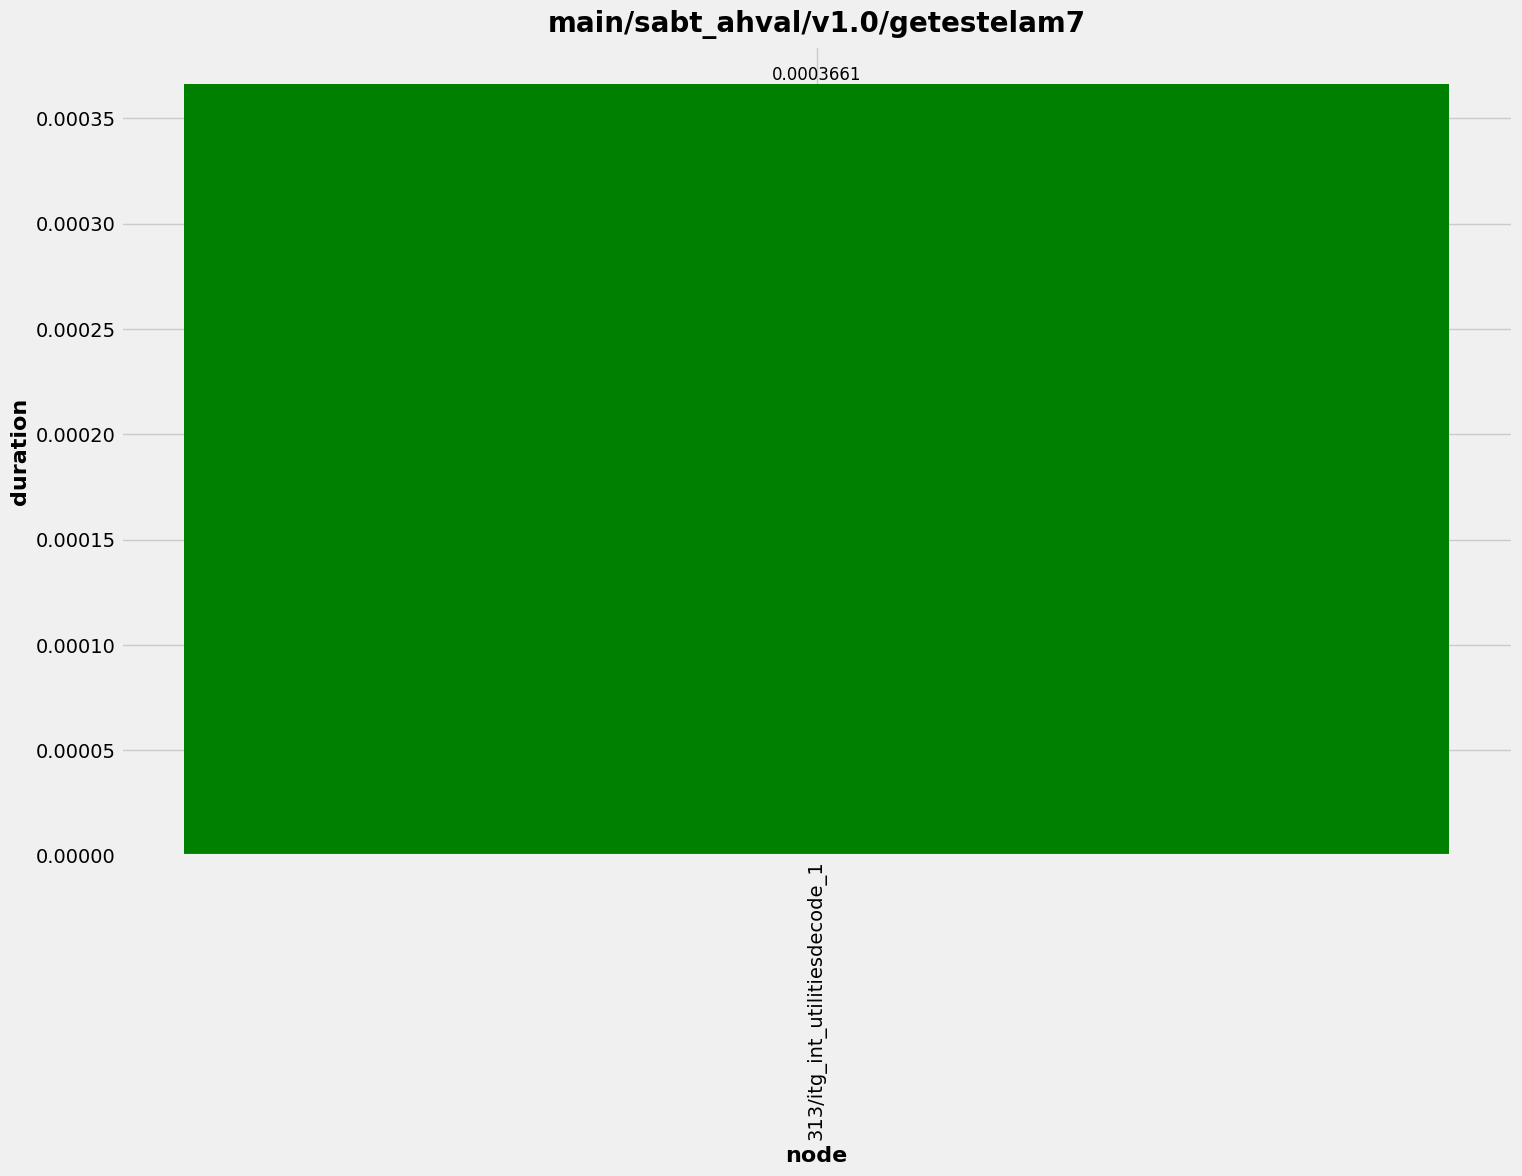

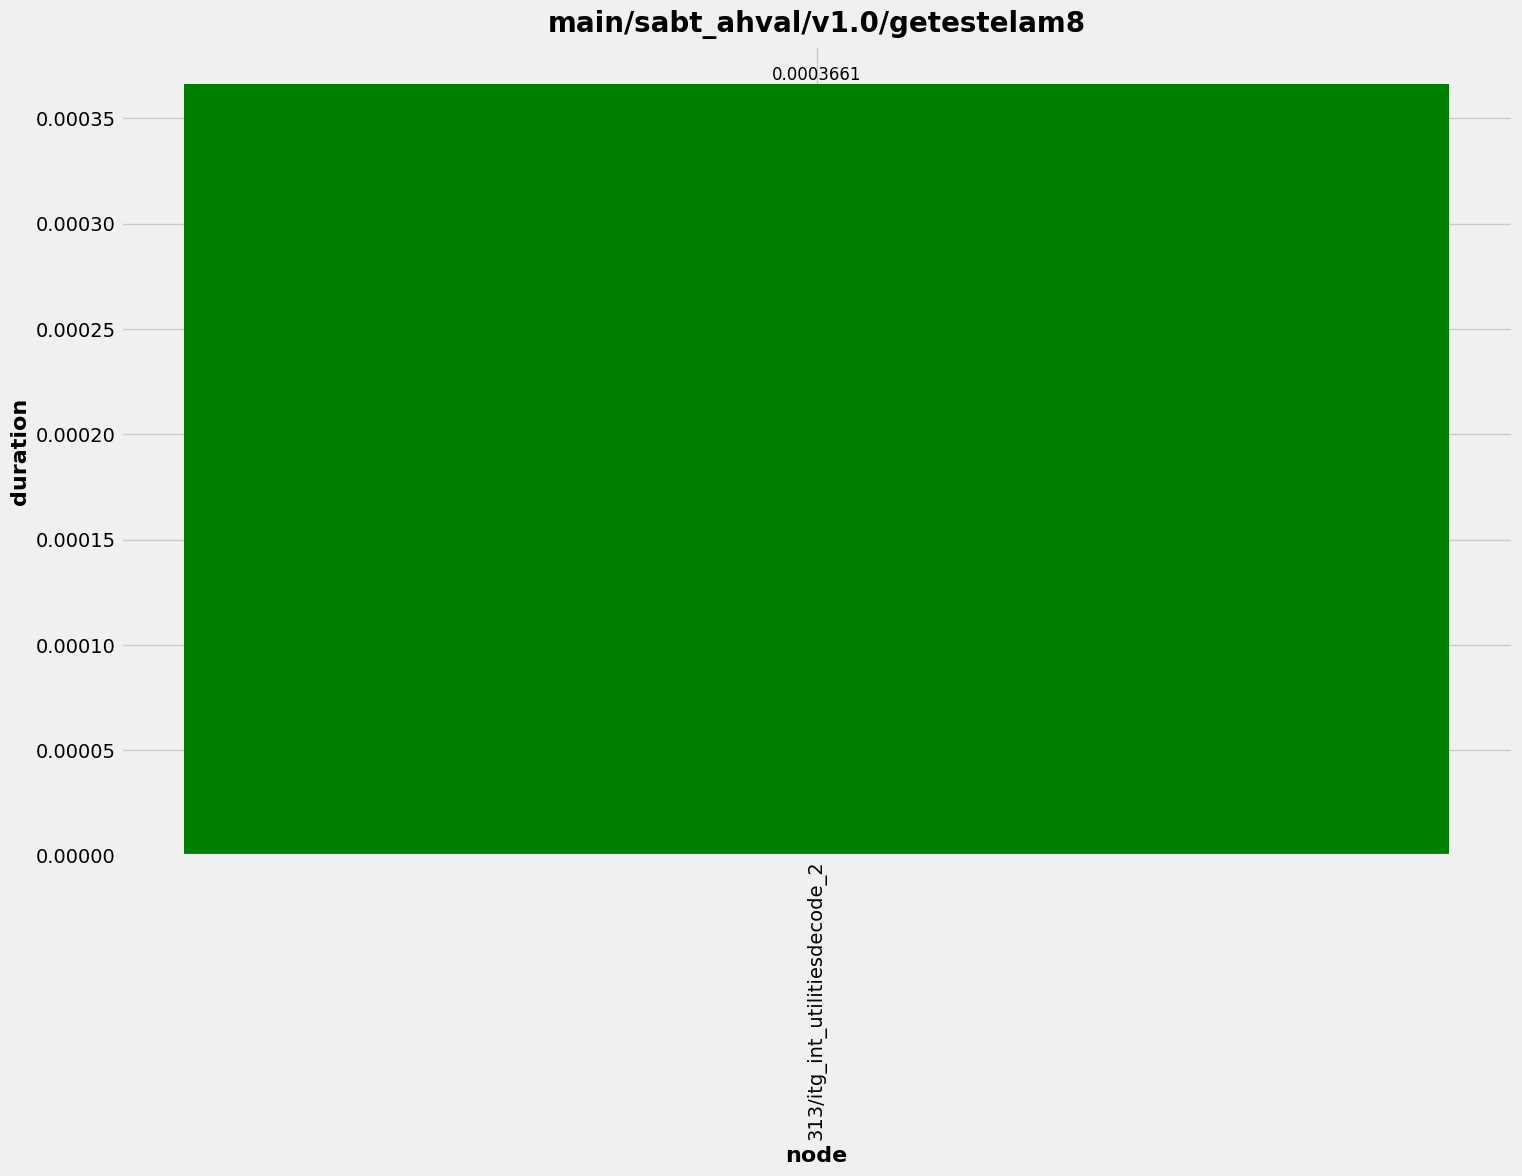

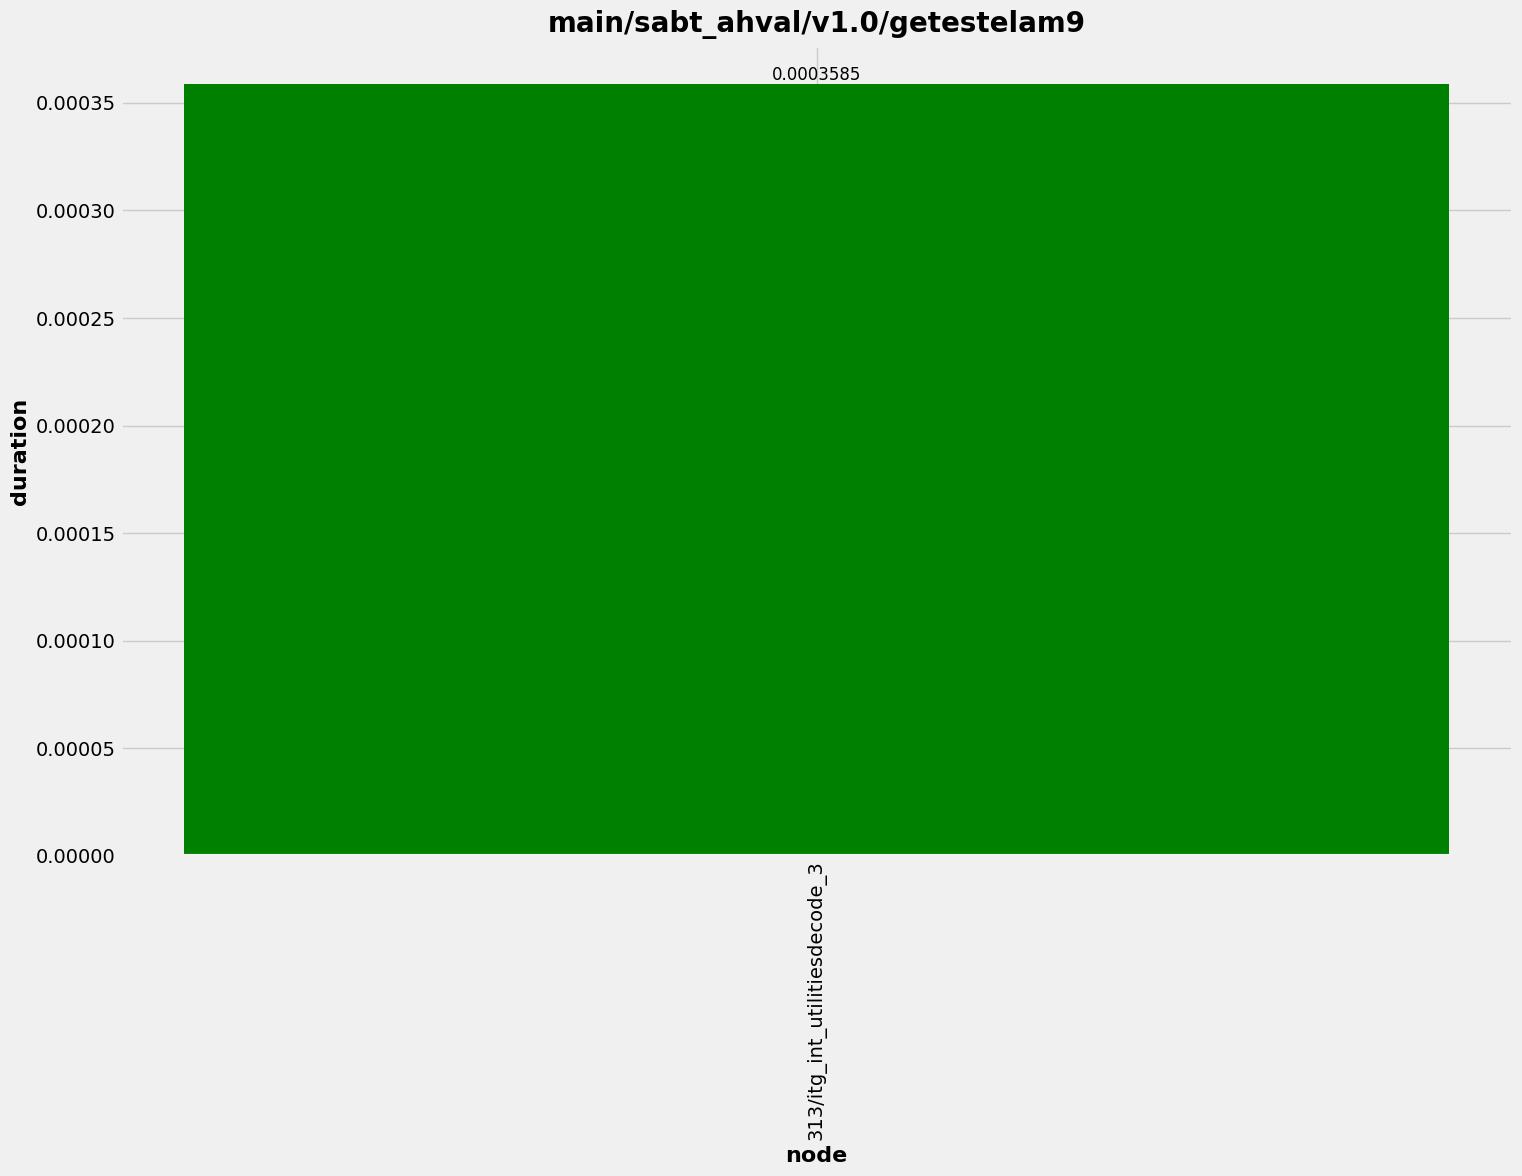

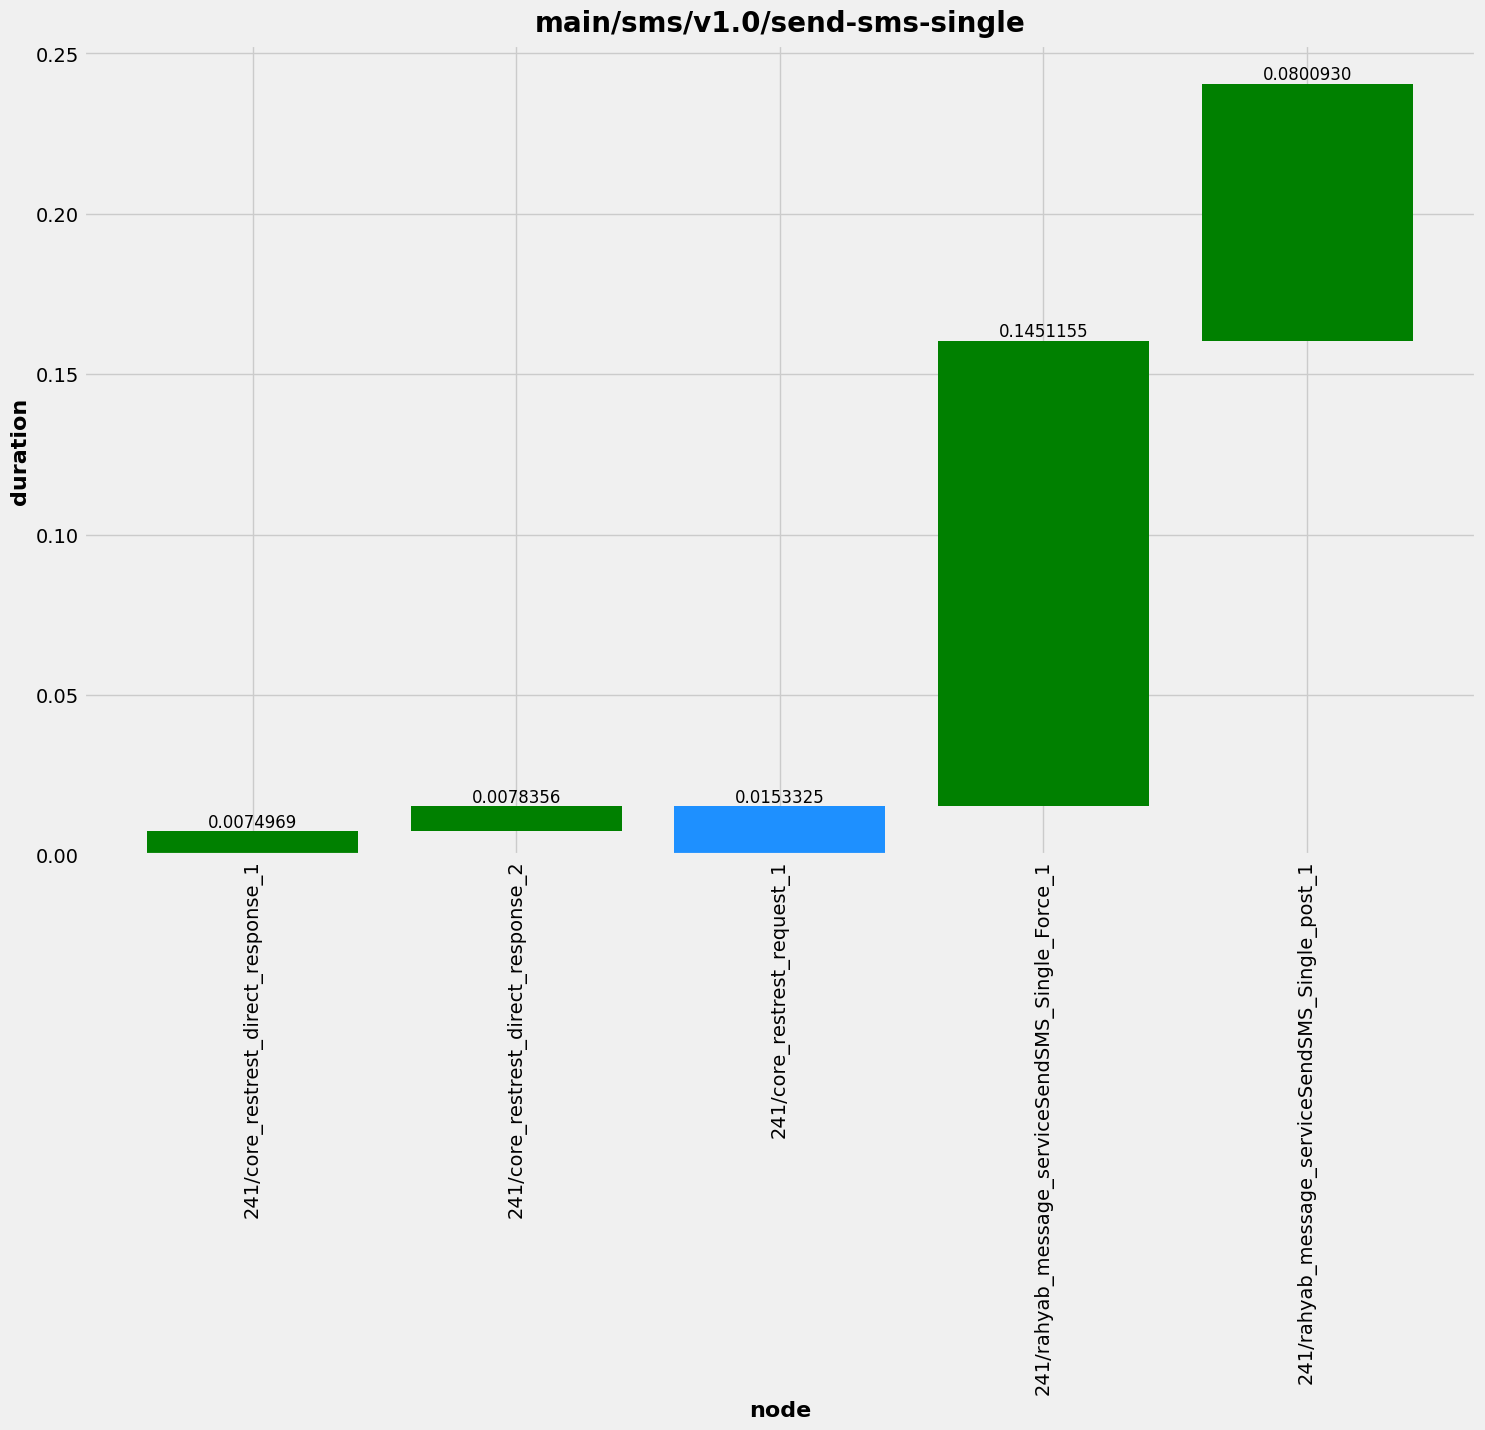

In [111]:
for name, flow in df2.groupby('apiname'):
  flow_df = pd.DataFrame({
      'label': flow['node_key'],
      'value': flow['avg(duration)'],
  })

  # add cumulative sum
  flow_df['cumulative'] = flow['avg(duration)'].cumsum()
  # add color
  flow_df['color'] = ['green' if val > 0 else 'red' if val < 0 else 'dodgerblue' for val in flow['avg(duration)']]
  # add bottom vs height value


  # print(flow_df)
  # print('----')

  values = flow_df['value'].to_list()
  cumulativea = flow_df['cumulative'].to_list()
  bottom = [0,]
  height = [values[0],]

  index = 1
  for i, val in enumerate(values[1:], start=1):
      if val==0: # Current Value equal to 0
          bottom.append(0)
          height.append(cumulativea[i])
      elif val > 0: # Current Value greater than 0
          if values[i-1] >=0:
              bottom.append(cumulativea[i-1])
          else:
              bottom.append(bottom[i-1])
          height.append(val)
      elif val < 0: # Current Value less than 0
          if values[i-1] >=0:
              bottom.append(cumulativea[i-1]+val)
          else:
              bottom.append(bottom[i-1]+val)
          height.append(-val)
      index += 1

  flow_df["bottom"] = bottom
  flow_df["height"] = height


In [110]:
def draw_watterbar_chart(df, title, xlabel, ylabel):

  fig = plt.figure(figsize=(16,10))

  plt.bar(df.index, height=df["height"], bottom=df["bottom"], color=df["color"]);
  #plt.step(df.index, df["Cumulative"], where="mid", color="black");

  plt.xticks(df.index, df["label"], fontdict=dict(fontsize=14), rotation='vertical');

  cumulative = df['cumulative'].to_list()
  values = df["value"].to_list()

  for idx in range(len(df)):
    plt.text(x=df.index[idx], y=cumulative[idx],
             s="{:.7f}".format(values[idx] if values[idx]!=0 else cumulative[idx]),
             ha="center", va="bottom", fontdict=dict(fontsize=12)
            );

  plt.xlabel(xlabel, fontdict=dict(fontsize=16, fontweight="bold"))
  plt.ylabel(ylabel, fontdict=dict(fontsize=16, fontweight="bold"))
  plt.title(title, loc="center", pad=10, fontdict=dict(fontsize=20, fontweight="bold"));
  plt.savefig(f"images/{title.split('/')[-1]}.png")